# 🎼 **PyComposition** – Transforming Weather Data into Music 🎶  

## 🌍 **From Climate to Composition: A Data-driven Musical experiment**  
This notebook explores the intersection between **data science and music composition**, using real **weather data** from OpenWeatherMap. Through a structured algorithmic process, it converts meteorological parameters such as **temperature, wind, and humidity** into musical elements like **pitch, duration, and rhythm**.  

### **✨ What does this Notebook do?**  
✅ **Extracts and analyzes weather data** from the city of Nice, France *(February 13–20, 2022, UTC+1)*  
✅ **Processes and scales data** to generate musical parameters  
✅ **Creates musical scores & melodies** using the **Music21** library  
✅ **Exports compositions in MusicXML & MIDI formats** for further arrangement  
✅ **Visualizes pitch distribution, duration relationships, and tonal analysis**  
✅ **Generates transpositions, melodic fragments, and harmonization from the data**  

This work serves as both an artistic and technical exploration, demonstrating how **structured numerical patterns** from meteorology can be transformed into **expressive musical pieces**. 🎵  

🔗 **Try it out, use your weather data, modify the parameters, and create your own data-driven compositions!**  



The dataset used spans a week-long period from February 13 to February 20, 2022 in the timezone Europe/Paris (UTC+1), at the city of Nice, in France.

##📚 Importing libraries  
This section loads the necessary Python libraries for handling data, visualization, and music generation.


In [1]:
#Importing libraries
import time
import json
import pandas
import random
import pandas as pd

from music21.musicxml.m21ToXml import ScoreExporter
from music21.converter.subConverters import ConverterMusicXML
from music21 import *
from music21.pitch import Pitch, Microtone
from collections import Counter
from itertools import zip_longest

%matplotlib inline

In [2]:
start = time.time()
max_time = 100
values = dict()

chans = dict(
    temp=1,
    humidity=2,
    wind_gust=3,
    dew_point=4,
    wind_deg=5,
    uvi=6,
)


## 🌍 Loading and processing Weather Data  
We extract meteorological data from OpenWeatherMap and structure it for further musical transformation.


In [6]:
with open("/content/sample_data/datanice.json") as json_file:
    data = json.load(json_file)
    for i in data['hourly']:
        thistemp = (i['temp'])
        thishumidity = (i['humidity'])
        thiswindgust = (i['wind_gust'])
        thisdewpoint = (i['dew_point'])
        thiswinddeg = [(i['wind_deg'])]
        thiswindgust = (i['uvi'])

#Getting hourly data from the json file
with open("/content/sample_data/datanice.json") as json_file:
    data = json.load(json_file)
    hourlydata = (data['hourly'])


# Extracting Maximum and Minimum values To scale the data into musical elements, we determine the highest and lowest values for each weather parameter.

    maxtemp = max(item['temp'] for item in hourlydata)
    maxhumidity = max(item['humidity'] for item in hourlydata)
    maxwind_gust = max(item['wind_gust'] for item in hourlydata)
    maxdew_point = max(item['dew_point'] for item in hourlydata)
    maxwind_deg = max(item['wind_deg'] for item in hourlydata)
    maxuvi = max(item['uvi'] for item in hourlydata)

#Getting minimum values
    mintemp = min(item['temp'] for item in hourlydata)
    minhumidity = min(item['humidity'] for item in hourlydata)
    minwind_gust = min(item['wind_gust'] for item in hourlydata)
    mindew_point = min(item['dew_point'] for item in hourlydata)
    minwind_deg = min(item['wind_deg'] for item in hourlydata)
    minuvi = min(item['uvi'] for item in hourlydata)



with open("/content/sample_data/datanice.json") as json_file:
    data = json.load(json_file)
    hourlydata = (data['hourly'])

    allparameters = []
    for parameter in hourlydata:
        allparameters.append(parameter['temp'])
        allparameters.append(parameter['humidity'])
        allparameters.append(parameter['wind_gust'])
        allparameters.append(parameter['dew_point'])
        allparameters.append(parameter['wind_deg'])
        allparameters.append(parameter['uvi'])

#Getting max and min of all parameters
    MaxMaxAll = max(allparameters)
    MinMinAll = min(allparameters)

    newMaxPitch = 72
    newMinPitch = 36

    newMaxDuration = 12
    newMinDuration = 0

#Scaling Data for Music Generation
#Weather parameters are mapped to musical attributes such as pitch and duration, ensuring they fit within a playable range.

    scaleAllPitches = []
    for itemP in allparameters:
        neoMaxP = (itemP - MinMinAll) / (MaxMaxAll - MinMinAll) * (newMaxPitch  - newMinPitch) + newMinPitch
        scaleAllPitches.append(neoMaxP)

    scaleAllDurations = []
    for itemD in allparameters:
        neoMaxD = (itemD - MinMinAll) / (MaxMaxAll - MinMinAll) * (newMaxDuration  - newMinDuration) + newMinDuration
        scaleAllDurations.append(neoMaxD)

#print(scaleAllPitches)
#print(scaleAllDurations)

[37.341953940781, 41.30911171506222, 36.34192533257045, 36.32750679445001, 48.20941210127306, 36.29249034472894, 37.319296238020314, 41.103132599055925, 36.3697325132313, 36.24923473036762, 48.31240165927621, 36.294550135889, 37.292518952939496, 40.897153483049635, 36.391360320411955, 36.16478329280503, 47.79745386926048, 36.24923473036762, 37.26677156343871, 40.79416392504649, 36.402689171792304, 36.110198827063364, 47.07652696323845, 36.178171935345446, 37.22454584465741, 40.897153483049635, 36.4057788585324, 36.10195966242311, 47.48848519525104, 36.111228722643396, 37.14112430267487, 41.20612215705908, 36.35531397511086, 36.03398655414104, 46.76755828922901, 36.07106279502217, 37.05873265627235, 41.618080389071665, 36.30793877842941, 36.04943498784151, 45.01673580317551, 36.056644256901734, 37.05564296953226, 41.51509083106852, 36.283221284508656, 36.03398655414104, 43.05993420111572, 36.056644256901734, 37.06491202975254, 41.41210127306537, 36.26159347732799, 36.00823916464025, 40.

## 🎼 Rounding and scaling values for Musical accuracy  
We round pitches and durations to ensure they conform to musical notation.


In [7]:
#Round to one decimal for pitch, and to three for duration
lst99 = []
for item in scaleAllPitches:
    rounded = round(item, 1)
    lst99.append(rounded)

#print(lst99)
max(lst99)

72.0

In [8]:
lst9 = []
for item in scaleAllDurations:
    rounded = round(item, 3)
    lst9.append(rounded)

#print(lst9)
#max(lst9)

In [ ]:
#Duration values
list919 = list(lst9)
#Pitchvalues
list
list9199 = list(lst99)

In [ ]:
#Round duration values to multiples of 0.125
durationValuesRoundedAllDurations = []
for v in list919:
    durationValuesRoundedDurations= float(round(v/0.125)*0.125)
    durationValuesRoundedAllDurations.append(durationValuesRoundedDurations)

#print(durationValuesRoundedAllDurations)

In [ ]:
#Round pitch values to multiples of 0.5
durationValuesRoundedAllPitches = []
for v in list9199:
    durationValuesRoundedPitches= float(round(v/0.5)*0.5)
    durationValuesRoundedAllPitches.append(durationValuesRoundedPitches)

#print(durationValuesRoundedAllPitches)

In [ ]:
#Reversed duration values

lstreverseDur = list(reversed(durationValuesRoundedAllDurations))
#print(lstreverseDur)

In [ ]:
#Force to get into octave number DO3,midinote36  to DO5,midinote72 (1) violoncelle reg centrale


rz = []
for i in durationValuesRoundedAllPitches:
    while i < 36:
        #print(i)
        i += 12
    else:
        #print('Loop ended, i =', i)
        #print(i)
        rz.append(i)

mylist7 = rz

In [ ]:
#Force to get into octave number DO3,midinote36  to DO5,midinote72 (2) violoncelle reg centrale

#Pitch  values
zz = []
for i in mylist7:
    while i > 72:

        i -= 12
    else:

        #print(i)

        zz.append(i)

lst = zz


In [ ]:
#Checking pitch and duration values length
print(len(lst))
print(len(durationValuesRoundedAllPitches))

288
288


## 🎶 Installing Lilypond, Music21 and Fluidsynth
We install libraries in order to visualize and hear the result of our transcoding process.

In [ ]:
# enables music21 to render images of musical notes
print('installing lilypond...')
!apt-get install lilypond > /dev/null

# converts midi files to wav files into order to play them
print('installing fluidsynth...')
!apt-get install fluidsynth > /dev/null
!cp /usr/share/sounds/sf2/FluidR3_GM.sf2 ./font.sf2
#from : https://colab.research.google.com/drive/17Fql7pyK3xsO8KmZorvb1tBoPomidCPB
print('done!')

installing lilypond...
installing fluidsynth...
done!


In [ ]:
!fluidsynth --version

FluidSynth version 1.1.9
Copyright (C) 2000-2018 Peter Hanappe and others.
Distributed under the LGPL license.
SoundFont(R) is a registered trademark of E-mu Systems, Inc.

FluidSynth 1.1.9


In [ ]:
!lilypond --version


GNU LilyPond 2.18.2

Copyright (c) 1996--2012 by
  Han-Wen Nienhuys <hanwen@xs4all.nl>
  Jan Nieuwenhuizen <janneke@gnu.org>
  and others.

This program is free software.  It is covered by the GNU General Public
License and you are welcome to change it and/or distribute copies of it
under certain conditions.  Invoke as `lilypond --warranty' for more
information.



In [ ]:
import music21
from IPython.display import Image, Audio

In [ ]:
def show(music):
  display(Image(str(music.write('lily.png'))))

def play(music):
  filename = music.write('mid')
  !fluidsynth -ni font.sf2 $filename -F $filename\.wav -r 16000 > /dev/null
  display(Audio(filename + '.wav'))

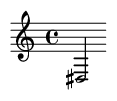

In [ ]:
#Testing library
n = music21.note.Note('D#3')
n.duration.type = 'half'
play(n)
show(n)

## 📝 Generating and exporting scores  
Using **Music21**, we create a musical score, convert it into **MusicXML** and **MIDI**, and prepare it for playback.


In [ ]:
#Score original
stream1y = stream.Stream()

index = 0
while index < len(lst):
    index = 0
    for valy in lst:
        print(valy)
        print(note.Note(valy).nameWithOctave)
        index +=1
        indexNote = (index - 1)
        stream1y.append(note.Note(valy, quarterLength=(durationValuesRoundedAllDurations[indexNote])))
        print('Index note:', indexNote + 1, '/', len(lst))
        #print((durationValuesRoundedAllDurations[indexNote]))
        stream1y.write('musicxml', fp='Nice_PyComposition_Score.xml')
        stream1y.write('midi', fp='Nice_PyComposition_Midi.mid')
        #stream1y.show()
        quantizePost=True
        quarterLengthDivisors=[12, 16]

37.5
C#~2
Index note: 1 / 288
41.5
F~2
Index note: 2 / 288
36.5
C~2
Index note: 3 / 288
36.5
C~2
Index note: 4 / 288
48.0
C3
Index note: 5 / 288
36.5
C~2
Index note: 6 / 288
37.5
C#~2
Index note: 7 / 288
41.0
F2
Index note: 8 / 288
36.5
C~2
Index note: 9 / 288
36.0
C2
Index note: 10 / 288
48.5
C~3
Index note: 11 / 288
36.5
C~2
Index note: 12 / 288
37.5
C#~2
Index note: 13 / 288
41.0
F2
Index note: 14 / 288
36.5
C~2
Index note: 15 / 288
36.0
C2
Index note: 16 / 288
48.0
C3
Index note: 17 / 288
36.0
C2
Index note: 18 / 288
37.5
C#~2
Index note: 19 / 288
41.0
F2
Index note: 20 / 288
36.5
C~2
Index note: 21 / 288
36.0
C2
Index note: 22 / 288
47.0
B2
Index note: 23 / 288
36.0
C2
Index note: 24 / 288
37.0
C#2
Index note: 25 / 288
41.0
F2
Index note: 26 / 288
36.5
C~2
Index note: 27 / 288
36.0
C2
Index note: 28 / 288
47.5
B~2
Index note: 29 / 288
36.0
C2
Index note: 30 / 288
37.0
C#2
Index note: 31 / 288
41.0
F2
Index note: 32 / 288
36.5
C~2
Index note: 33 / 288
36.0
C2
Index note: 34 / 288
4

meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 2 of 
[None, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


36.5
C~2
Index note: 267 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 2 of 
[None, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


36.5
C~2
Index note: 268 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 2 of 
[None, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


70.0
B-4
Index note: 269 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 2 of 
[None, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


36.0
C2
Index note: 270 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 2 of 
[None, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


37.0
C#2
Index note: 271 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 2 of 
[None, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


44.5
G#~2
Index note: 272 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 2 of 
[None, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 2 of 
[None, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


36.5
C~2
Index note: 273 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 2 of 
[None, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 2 of 
[None, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


36.5
C~2
Index note: 274 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 2 of 
[None, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 2 of 
[None, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


69.0
A4
Index note: 275 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 2 of 
[None, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 2 of 
[None, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


36.0
C2
Index note: 276 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 2 of 
[None, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 2 of 
[None, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


37.0
C#2
Index note: 277 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 2 of 
[None, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 2 of 
[None, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


44.0
G#2
Index note: 278 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 2 of 
[None, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 2 of 
[None, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


36.5
C~2
Index note: 279 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 2 of 
[None, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 2 of 
[None, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


36.5
C~2
Index note: 280 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 2 of 
[None, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 2 of 
[None, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


66.5
F#~4
Index note: 281 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 2 of 
[None, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 2 of 
[None, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


36.0
C2
Index note: 282 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 2 of 
[None, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 2 of 
[None, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


37.0
C#2
Index note: 283 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 2 of 
[None, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 2 of 
[None, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


44.0
G#2
Index note: 284 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 2 of 
[None, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 2 of 
[None, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


36.0
C2
Index note: 285 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 2 of 
[None, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 2 of 
[None, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


36.5
C~2
Index note: 286 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 2 of 
[None, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 2 of 
[None, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


61.0
C#4
Index note: 287 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 2 of 
[None, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 2 of 
[None, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


36.0
C2
Index note: 288 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 2 of 
[None, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 2 of 
[None, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


In [ ]:
#Saving annd exporting the first score
firstScore= stream.Score()
firstScore.append([stream1y])


firstScore.insert(0, metadata.Metadata())
firstScore.metadata.title = 'First Score Nice PyComposition'
firstScore.metadata.composer = 'Data'
#firstScore.show()

#firstScore.show('midi')
firstScore.write('musicxml', fp='First_Score_Nice_PyComposition.xml')

meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 2 of 
[None, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 2 of 
[None, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


'/content/First_Score_Nice_PyComposition.xml'

In [ ]:
pynice = music21.converter.parse('First_Score_Nice_PyComposition.xml')
play(pynice)
show(pynice)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
ssss = converter.parse('First_Score_Nice_PyComposition.xml')
#ssss.show()


In [ ]:
# Reverse the order of pitch list elements
lstreverse = list(reversed(lst))

#print(lstreverse)

In [ ]:
#Score original in REVERSED mode, in order to create new musical materials

from music21 import *
stream1x1x = stream.Stream()

index = 0
while index < len(lstreverse):
    for valx in lstreverse:
        print(valx)
        print(note.Note(valx).nameWithOctave)
        index +=1
        indexNote2 = (index - 1)
        stream1x1x.append(note.Note(valx, quarterLength=(lstreverseDur[indexNote2])))
        print('Index note:', indexNote2 + 1, '/', len(lstreverse))
        stream1x1x.write('musicxml', fp='Nice_PyComposition_Score_Reversed.xml')
        stream1x1x.write('midi', fp='Nice_PyComposition_Midi_Reversed.mid')
        #stream1x1x.show()
        quantizePost=True
        quarterLengthDivisors=[12, 16]


36.0
C2
Index note: 1 / 288
61.0
C#4
Index note: 2 / 288
36.5
C~2
Index note: 3 / 288
36.0
C2
Index note: 4 / 288
44.0
G#2
Index note: 5 / 288
37.0
C#2
Index note: 6 / 288
36.0
C2
Index note: 7 / 288
66.5
F#~4
Index note: 8 / 288
36.5
C~2
Index note: 9 / 288
36.5
C~2
Index note: 10 / 288
44.0
G#2
Index note: 11 / 288
37.0
C#2
Index note: 12 / 288
36.0
C2
Index note: 13 / 288
69.0
A4
Index note: 14 / 288
36.5
C~2
Index note: 15 / 288
36.5
C~2
Index note: 16 / 288
44.5
G#~2
Index note: 17 / 288
37.0
C#2
Index note: 18 / 288
36.0
C2
Index note: 19 / 288
70.0
B-4
Index note: 20 / 288
36.5
C~2
Index note: 21 / 288
36.5
C~2
Index note: 22 / 288
45.0
A2
Index note: 23 / 288
36.5
C~2
Index note: 24 / 288
36.0
C2
Index note: 25 / 288
70.5
B`4
Index note: 26 / 288
36.5
C~2
Index note: 27 / 288
36.5
C~2
Index note: 28 / 288
45.0
A2
Index note: 29 / 288
36.5
C~2
Index note: 30 / 288
36.0
C2
Index note: 31 / 288
71.5
B~4
Index note: 32 / 288
36.5
C~2
Index note: 33 / 288
36.5
C~2
Index note: 34 / 2

meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


40.0
E2
Index note: 80 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


36.5
C~2
Index note: 81 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


37.0
C#2
Index note: 82 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


45.5
A~2
Index note: 83 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


37.0
C#2
Index note: 84 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


36.0
C2
Index note: 85 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


41.0
F2
Index note: 86 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


36.5
C~2
Index note: 87 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


37.0
C#2
Index note: 88 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


45.0
A2
Index note: 89 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


37.0
C#2
Index note: 90 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


36.0
C2
Index note: 91 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


42.0
F#2
Index note: 92 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


36.5
C~2
Index note: 93 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


36.5
C~2
Index note: 94 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


45.0
A2
Index note: 95 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


37.0
C#2
Index note: 96 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


36.0
C2
Index note: 97 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


41.0
F2
Index note: 98 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


37.0
C#2
Index note: 99 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


36.5
C~2
Index note: 100 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


45.5
A~2
Index note: 101 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


37.0
C#2
Index note: 102 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


36.0
C2
Index note: 103 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


44.0
G#2
Index note: 104 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


37.0
C#2
Index note: 105 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


36.5
C~2
Index note: 106 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


45.5
A~2
Index note: 107 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


37.0
C#2
Index note: 108 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


36.0
C2
Index note: 109 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


45.0
A2
Index note: 110 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


37.0
C#2
Index note: 111 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


36.5
C~2
Index note: 112 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


45.5
A~2
Index note: 113 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


37.0
C#2
Index note: 114 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


36.0
C2
Index note: 115 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


44.0
G#2
Index note: 116 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


36.5
C~2
Index note: 117 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


36.5
C~2
Index note: 118 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


45.0
A2
Index note: 119 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


37.0
C#2
Index note: 120 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


36.0
C2
Index note: 121 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


41.5
F~2
Index note: 122 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


36.5
C~2
Index note: 123 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


36.5
C~2
Index note: 124 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


45.0
A2
Index note: 125 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


37.0
C#2
Index note: 126 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


36.0
C2
Index note: 127 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


44.5
G#~2
Index note: 128 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


36.5
C~2
Index note: 129 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


36.5
C~2
Index note: 130 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


45.0
A2
Index note: 131 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


37.0
C#2
Index note: 132 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


36.0
C2
Index note: 133 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


44.0
G#2
Index note: 134 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


36.5
C~2
Index note: 135 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


36.5
C~2
Index note: 136 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


44.5
G#~2
Index note: 137 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


37.0
C#2
Index note: 138 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


36.0
C2
Index note: 139 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


44.0
G#2
Index note: 140 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


36.5
C~2
Index note: 141 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


36.5
C~2
Index note: 142 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


44.5
G#~2
Index note: 143 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


37.0
C#2
Index note: 144 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


36.0
C2
Index note: 145 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


44.0
G#2
Index note: 146 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


36.5
C~2
Index note: 147 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


36.5
C~2
Index note: 148 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


44.5
G#~2
Index note: 149 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


37.0
C#2
Index note: 150 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


36.0
C2
Index note: 151 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


43.5
G~2
Index note: 152 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


36.5
C~2
Index note: 153 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


36.5
C~2
Index note: 154 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


44.5
G#~2
Index note: 155 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


37.0
C#2
Index note: 156 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


36.0
C2
Index note: 157 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


44.0
G#2
Index note: 158 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


36.5
C~2
Index note: 159 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


36.5
C~2
Index note: 160 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


44.5
G#~2
Index note: 161 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


37.0
C#2
Index note: 162 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


36.0
C2
Index note: 163 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


45.5
A~2
Index note: 164 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


36.5
C~2
Index note: 165 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


36.5
C~2
Index note: 166 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


44.5
G#~2
Index note: 167 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


37.0
C#2
Index note: 168 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


36.0
C2
Index note: 169 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


45.0
A2
Index note: 170 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


36.5
C~2
Index note: 171 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


36.5
C~2
Index note: 172 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


44.0
G#2
Index note: 173 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


37.0
C#2
Index note: 174 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


36.0
C2
Index note: 175 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


43.5
G~2
Index note: 176 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


36.5
C~2
Index note: 177 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


36.0
C2
Index note: 178 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


44.0
G#2
Index note: 179 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


37.0
C#2
Index note: 180 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


36.0
C2
Index note: 181 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


41.0
F2
Index note: 182 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


36.5
C~2
Index note: 183 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


36.5
C~2
Index note: 184 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


43.5
G~2
Index note: 185 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


37.0
C#2
Index note: 186 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


36.0
C2
Index note: 187 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


39.0
E-2
Index note: 188 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


36.5
C~2
Index note: 189 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


36.5
C~2
Index note: 190 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


43.5
G~2
Index note: 191 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


37.0
C#2
Index note: 192 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


36.0
C2
Index note: 193 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 4 of 
[None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/start>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>/<music21.bea

38.0
D2
Index note: 194 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 4 of 
[None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/start>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>/<music21.bea

36.5
C~2
Index note: 195 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 4 of 
[None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/start>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>/<music21.bea

36.5
C~2
Index note: 196 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 4 of 
[None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/start>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>/<music21.bea

43.5
G~2
Index note: 197 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 4 of 
[None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/start>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>/<music21.bea

37.0
C#2
Index note: 198 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 4 of 
[None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/start>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>/<music21.bea

36.0
C2
Index note: 199 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 4 of 
[None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/start>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>/<music21.bea

37.0
C#2
Index note: 200 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 4 of 
[None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/start>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>/<music21.bea

36.0
C2
Index note: 201 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 4 of 
[None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/start>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>/<music21.bea

36.5
C~2
Index note: 202 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 4 of 
[None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/start>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>/<music21.bea

43.0
G2
Index note: 203 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 4 of 
[None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/start>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>/<music21.bea

37.0
C#2
Index note: 204 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 4 of 
[None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/start>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>/<music21.bea

36.0
C2
Index note: 205 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 4 of 
[None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/start>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>/<music21.bea

36.5
C~2
Index note: 206 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 4 of 
[None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/start>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>/<music21.bea

36.0
C2
Index note: 207 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 4 of 
[None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/start>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>/<music21.bea

36.5
C~2
Index note: 208 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 4 of 
[None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/start>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>/<music21.bea

42.0
F#2
Index note: 209 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 4 of 
[None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/start>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>/<music21.bea

37.0
C#2
Index note: 210 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 4 of 
[None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/start>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>/<music21.bea

36.0
C2
Index note: 211 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 4 of 
[None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/start>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>/<music21.bea

37.5
C#~2
Index note: 212 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 4 of 
[None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/start>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>/<music21.bea

36.0
C2
Index note: 213 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 4 of 
[None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/start>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>/<music21.bea

36.5
C~2
Index note: 214 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 4 of 
[None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/start>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>/<music21.bea

42.0
F#2
Index note: 215 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 4 of 
[None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/start>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>/<music21.bea

37.0
C#2
Index note: 216 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 4 of 
[None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/start>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>/<music21.bea

36.0
C2
Index note: 217 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 4 of 
[None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/start>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>/<music21.bea

37.0
C#2
Index note: 218 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 4 of 
[None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/start>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>/<music21.bea

36.0
C2
Index note: 219 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 4 of 
[None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/start>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>/<music21.bea

36.5
C~2
Index note: 220 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 4 of 
[None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/start>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>/<music21.bea

42.0
F#2
Index note: 221 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 4 of 
[None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/start>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>/<music21.bea

37.0
C#2
Index note: 222 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 4 of 
[None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/start>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>/<music21.bea

36.0
C2
Index note: 223 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 4 of 
[None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/start>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>/<music21.bea

38.5
D~2
Index note: 224 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 4 of 
[None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/start>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>/<music21.bea

36.0
C2
Index note: 225 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 4 of 
[None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/start>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>/<music21.bea

36.5
C~2
Index note: 226 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 4 of 
[None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/start>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>/<music21.bea

42.0
F#2
Index note: 227 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 4 of 
[None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/start>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>/<music21.bea

37.0
C#2
Index note: 228 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 4 of 
[None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/start>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>/<music21.bea

36.0
C2
Index note: 229 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 4 of 
[None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/start>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>/<music21.bea

39.5
E`2
Index note: 230 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 4 of 
[None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/start>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>/<music21.bea

36.0
C2
Index note: 231 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 4 of 
[None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/start>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>/<music21.bea

36.0
C2
Index note: 232 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 4 of 
[None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/start>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>/<music21.bea

41.5
F~2
Index note: 233 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 4 of 
[None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/start>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>/<music21.bea

37.0
C#2
Index note: 234 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 4 of 
[None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/start>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>/<music21.bea

36.0
C2
Index note: 235 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 4 of 
[None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/start>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>/<music21.bea

40.0
E2
Index note: 236 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 4 of 
[None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/start>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>/<music21.bea

36.0
C2
Index note: 237 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 4 of 
[None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/start>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>/<music21.bea

36.5
C~2
Index note: 238 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 4 of 
[None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/start>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>/<music21.bea

41.5
F~2
Index note: 239 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 4 of 
[None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/start>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>/<music21.bea

37.0
C#2
Index note: 240 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 4 of 
[None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/start>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>/<music21.bea

36.0
C2
Index note: 241 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 4 of 
[None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/start>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>/<music21.bea

43.0
G2
Index note: 242 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 4 of 
[None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/start>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>/<music21.bea

36.0
C2
Index note: 243 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 4 of 
[None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/start>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>/<music21.bea

36.5
C~2
Index note: 244 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 4 of 
[None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/start>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>/<music21.bea

41.5
F~2
Index note: 245 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 4 of 
[None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/start>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>/<music21.bea

37.0
C#2
Index note: 246 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 4 of 
[None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/start>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>/<music21.bea

36.0
C2
Index note: 247 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 4 of 
[None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/start>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>/<music21.bea

45.0
A2
Index note: 248 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 4 of 
[None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/start>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>/<music21.bea

36.0
C2
Index note: 249 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 4 of 
[None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/start>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>/<music21.bea

36.5
C~2
Index note: 250 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 4 of 
[None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/start>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>/<music21.bea

41.5
F~2
Index note: 251 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 4 of 
[None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/start>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>/<music21.bea

37.0
C#2
Index note: 252 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 4 of 
[None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/start>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>/<music21.bea

36.0
C2
Index note: 253 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 4 of 
[None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/start>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>/<music21.bea

47.0
B2
Index note: 254 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 4 of 
[None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/start>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>/<music21.bea

36.0
C2
Index note: 255 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 4 of 
[None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/start>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>/<music21.bea

36.5
C~2
Index note: 256 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 4 of 
[None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/start>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>/<music21.bea

41.0
F2
Index note: 257 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 4 of 
[None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/start>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>/<music21.bea

37.0
C#2
Index note: 258 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 4 of 
[None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/start>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>/<music21.bea

36.0
C2
Index note: 259 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 4 of 
[None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/start>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>/<music21.bea

47.5
B~2
Index note: 260 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 4 of 
[None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/start>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>/<music21.bea

36.0
C2
Index note: 261 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 4 of 
[None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/start>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>/<music21.bea

36.5
C~2
Index note: 262 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 4 of 
[None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/start>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>/<music21.bea

41.0
F2
Index note: 263 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 4 of 
[None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/start>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>/<music21.bea

37.0
C#2
Index note: 264 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 4 of 
[None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/start>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>/<music21.bea

36.0
C2
Index note: 265 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 4 of 
[None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/start>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>/<music21.bea

47.0
B2
Index note: 266 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 4 of 
[None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/start>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>/<music21.bea

36.0
C2
Index note: 267 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 4 of 
[None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/start>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>/<music21.bea

36.5
C~2
Index note: 268 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 4 of 
[None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/start>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>/<music21.bea

41.0
F2
Index note: 269 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 4 of 
[None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/start>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>/<music21.bea

37.5
C#~2
Index note: 270 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 4 of 
[None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/start>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>/<music21.bea

36.0
C2
Index note: 271 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 4 of 
[None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/start>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>/<music21.bea

48.0
C3
Index note: 272 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 4 of 
[None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/start>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>/<music21.bea

36.0
C2
Index note: 273 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 4 of 
[None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/start>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>/<music21.bea

36.5
C~2
Index note: 274 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 4 of 
[None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/start>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>/<music21.bea

41.0
F2
Index note: 275 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 4 of 
[None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/start>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>/<music21.bea

37.5
C#~2
Index note: 276 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 4 of 
[None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/start>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>/<music21.bea

36.5
C~2
Index note: 277 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 4 of 
[None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/start>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>/<music21.bea

48.5
C~3
Index note: 278 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 4 of 
[None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/start>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>/<music21.bea

36.0
C2
Index note: 279 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 4 of 
[None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/start>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>/<music21.bea

36.5
C~2
Index note: 280 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 4 of 
[None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/start>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>/<music21.bea

41.0
F2
Index note: 281 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 4 of 
[None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/start>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>/<music21.bea

37.5
C#~2
Index note: 282 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 4 of 
[None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/start>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>/<music21.bea

36.5
C~2
Index note: 283 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 4 of 
[None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/start>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>/<music21.bea

48.0
C3
Index note: 284 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 4 of 
[None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/start>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>/<music21.bea

36.5
C~2
Index note: 285 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 4 of 
[None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/start>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>/<music21.bea

36.5
C~2
Index note: 286 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 4 of 
[None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/start>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>/<music21.bea

41.5
F~2
Index note: 287 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 4 of 
[None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/start>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>/<music21.bea

37.5
C#~2
Index note: 288 / 288


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 4 of 
[None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/start>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>/<music21.bea

In [ ]:
reversedScore= stream.Score()
reversedScore.append([stream1x1x])


reversedScore.insert(0, metadata.Metadata())
reversedScore.metadata.title = 'First Score Reversed Nice PyComposition'
reversedScore.metadata.composer = 'Data'
#reversedScore.show()

#reversedScore.show('midi')
reversedScore.write('musicxml', fp='First_Score_Reversed_Nice_PyComposition.xml')

meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[<music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]
meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 4 of 
[None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/start>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>/<music21.bea

'/content/First_Score_Reversed_Nice_PyComposition.xml'

In [ ]:
pynicereversed = music21.converter.parse('First_Score_Reversed_Nice_PyComposition.xml')
play(pynicereversed)
show(pynicereversed)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
sssss = converter.parse('First_Score_Reversed_Nice_PyComposition.xml')
#sssss.show()

## 🎶 Musical analysis Visualization  
We visualize pitch and rythm contents using visualizations.


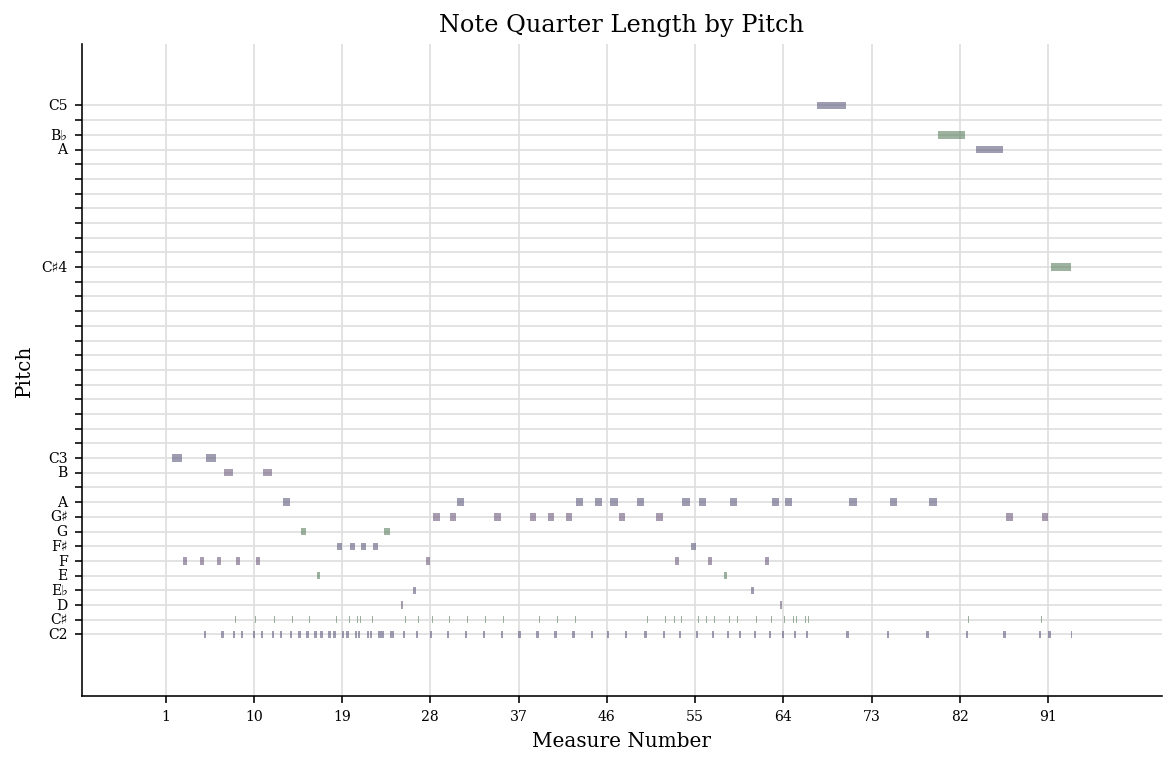

In [ ]:
#Pitch distribution according to Measure Number, in first score
ssss.plot()

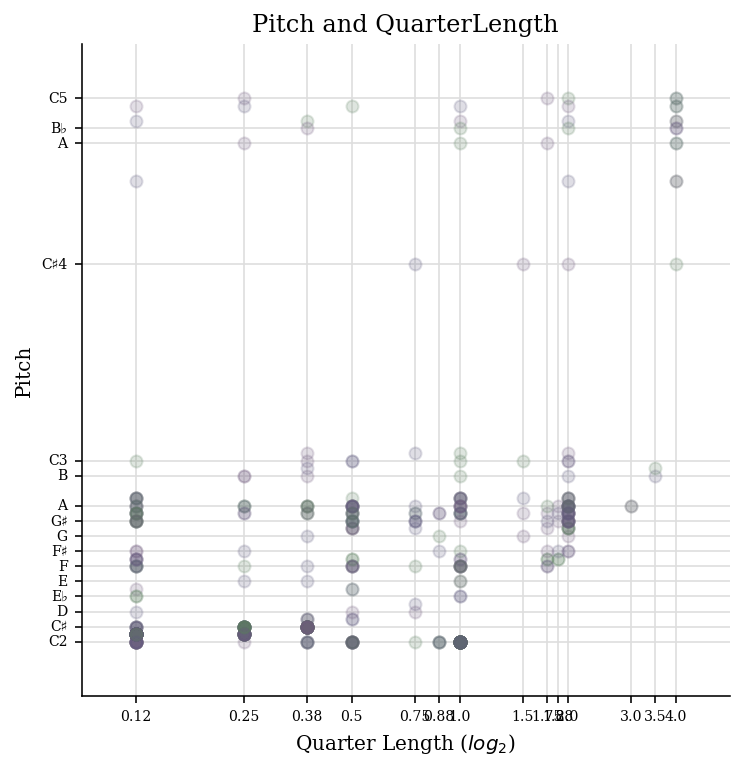

In [ ]:
#Relation between pitch and quarter length value, in first score
ssss.plot('scatter', 'quarterlength', 'pitch', title='Pitch and QuarterLength')

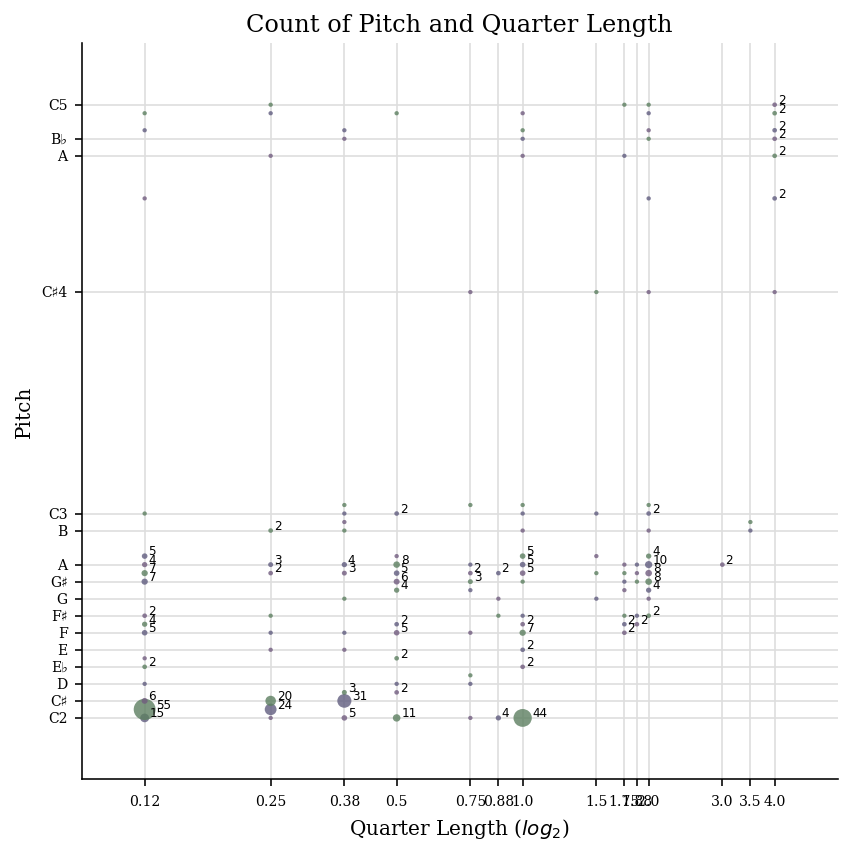

In [ ]:
#Count of pitch and quarter length, in first score
#Choose the measures range, in this case there are 288 measures
ssss.measures(1, 284).plot('scatterweighted', 'pitch', 'quarterLength')

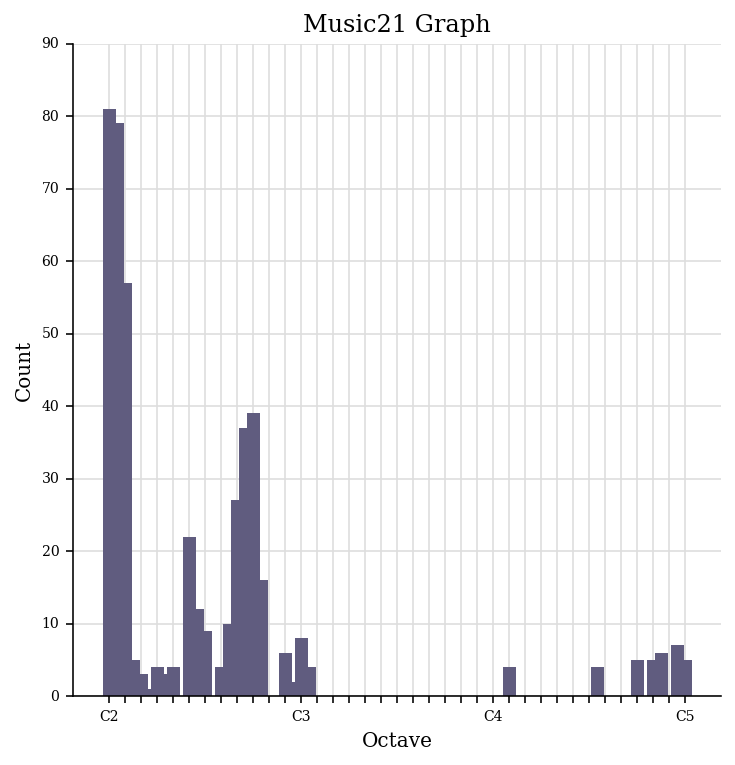

In [ ]:
#Octave count per pitch, in first score
ssss.plot('histogram', 'octave', xHideUnused=False, yAxisLabel='Number of Pitches')

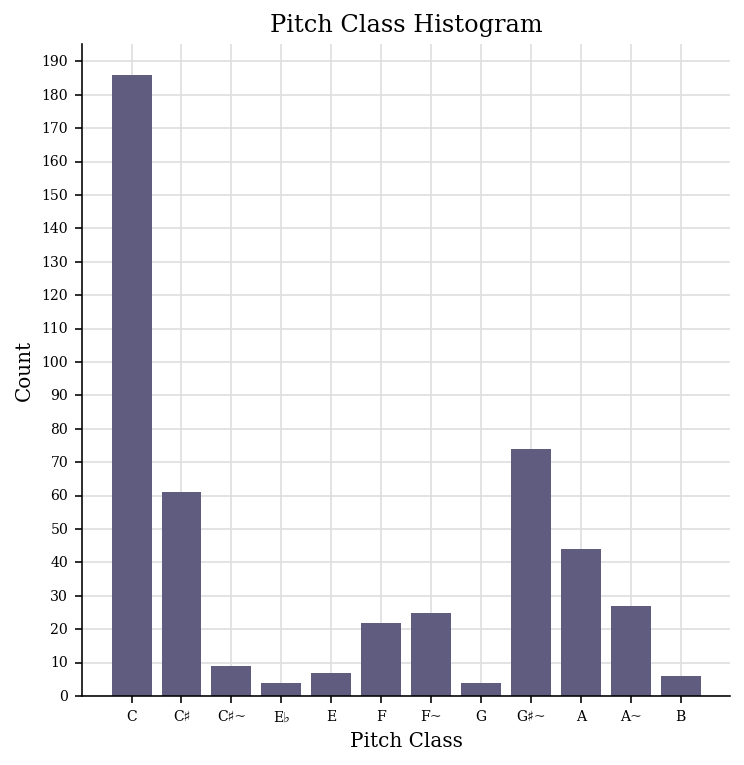

In [ ]:
#Pitch class count, in first score
ssss.plot('histogram', 'pitchClass')

In [ ]:
#Tonality approximation analysis, music21,Krumhans and AardenEssen algorithms; in first score
#Change the file location and the chosen name
ss44 = converter.parse('First_Score_Nice_PyComposition.xml')
key = ss44.analyze('key')
print('Approximate key: ', key.tonic.name, key.mode)
key1 = ss44.analyze('Krumhansl')
print('Krumhansl algorithm:', key1)
key2 = ss44.analyze('AardenEssen')
print('AardenEssen algorithm:', key2)


Approximate key:  F minor
Krumhansl algorithm: A- major
AardenEssen algorithm: f minor


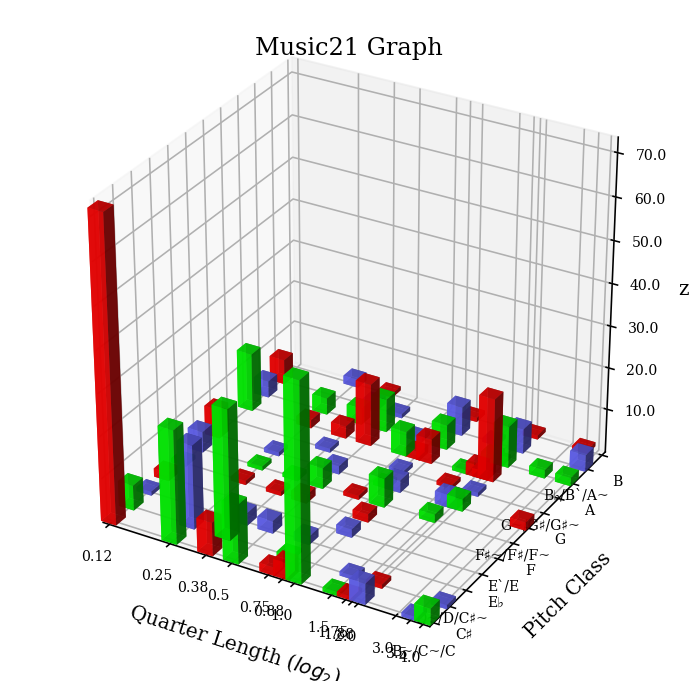

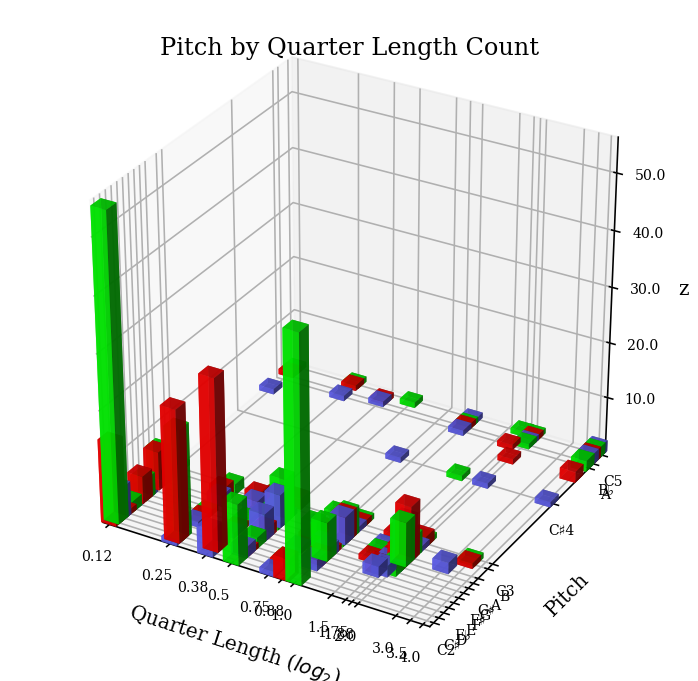

In [ ]:
#3D Visualisation of pitch and quarter length count, in first score
ssss.plot('3dbars')

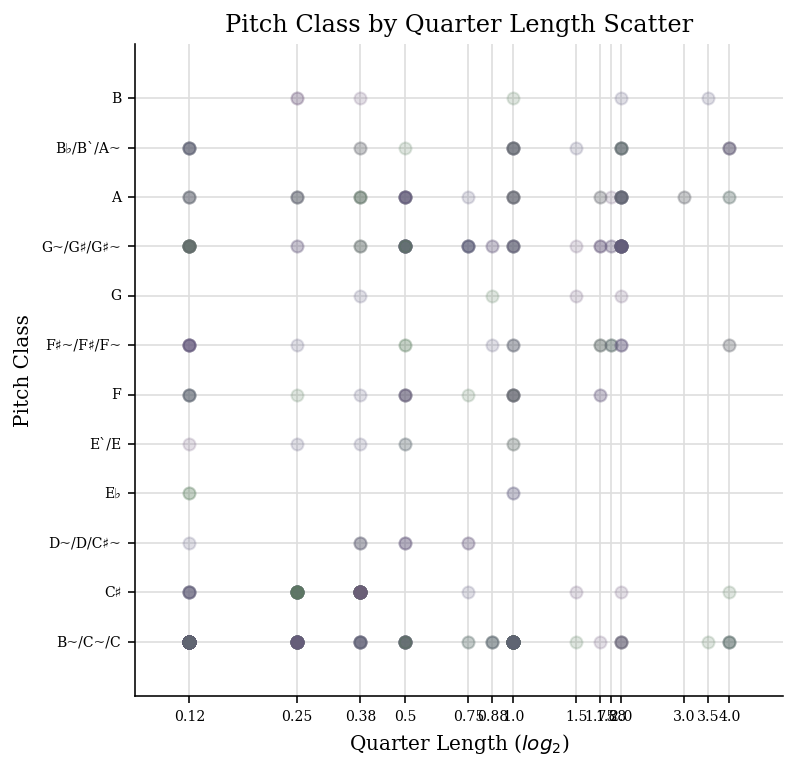

In [ ]:
# Pitch class and quarter length relation visualisation, in first score
ssss.plot('scatter', 'pitchClass', 'quarterLength')

In [ ]:
#Get all parameters of each value,
#https://stackoverflow.com/questions/45093673/iterating-over-all-notes-in-music21
import music21 as m
song = m.converter.parse('First_Score_Nice_PyComposition.xml')
#Process the ties
song = song.stripTies()
#Unfold repetitions
i = 0;
for a in stream1y:
    if a.isStream:
        e = m.repeat.Expander(a)
        s2 = e.process()
        timing = s2.secondsMap
        song[i] = s2
    i += 1;

#To do: add note onsets

def getMusicProperties(x):
    s = '';
    t='';
    s = str(x.pitch) + ", " + str(x.duration.type) + ", " + str(x.duration.quarterLength);
    s += ", "
    if x.tie != None:
        t = x.tie.type;
    s += t + ", " + str(x.pitch.ps) + ", " + str(x.octave); # + str(x.seconds)  # x.seconds not always there
    return s



print('pitch, duration_string, duration, tie, midi pitch, octave')
mylist4 = []
allPitches = []
letterPitch = []
for a in song.recurse().notes:


    if (a.isNote):
        x = a;
        s = getMusicProperties(x);
        print(s);
        #print(x.pitch.ps)
        ptch= x.pitch.ps
        letter = str(x.pitch)
        allPitches.append(ptch)
        letterPitch.append(letter)



    if (a.isChord):
        for x in a._notes:
            s = getMusicProperties(x);

            print(s);


#All pitch values
mylist3 = allPitches


print("Done.")


pitch, duration_string, duration, tie, midi pitch, octave
C#~2, eighth, 0.5, , 37.5, 2
F~2, quarter, 1.75, , 41.5, 2
C~2, 32nd, 0.125, , 36.5, 2
C~2, 32nd, 0.125, , 36.5, 2
C3, complex, 4.125, , 48.0, 3
C~2, 32nd, 0.125, , 36.5, 2
C#~2, eighth, 0.5, , 37.5, 2
F2, quarter, 1.75, , 41.0, 2
C~2, 32nd, 0.125, , 36.5, 2
C2, 32nd, 0.125, , 36.0, 2
C~3, complex, 4.125, , 48.5, 3
C~2, 32nd, 0.125, , 36.5, 2
C#~2, 16th, 0.375, , 37.5, 2
F2, complex, 1.625, , 41.0, 2
C~2, 32nd, 0.125, , 36.5, 2
C2, quarter, 1.0, , 36.0, 2
C3, half, 3.875, , 48.0, 3
C2, 32nd, 0.125, , 36.0, 2
C#~2, 16th, 0.375, , 37.5, 2
F2, complex, 1.625, , 41.0, 2
C~2, 32nd, 0.125, , 36.5, 2
C2, quarter, 1.0, , 36.0, 2
B2, half, 3.75, , 47.0, 2
C2, quarter, 1.0, , 36.0, 2
C#2, 16th, 0.375, , 37.0, 2
F2, complex, 1.625, , 41.0, 2
C~2, 32nd, 0.125, , 36.5, 2
C2, quarter, 1.0, , 36.0, 2
B~2, half, 3.875, , 47.5, 2
C2, quarter, 1.0, , 36.0, 2
C#2, 16th, 0.375, , 37.0, 2
F2, quarter, 1.75, , 41.0, 2
C~2, 32nd, 0.125, , 36.5, 2
C2, 

## 🎶 Scales construction  
We analyze the resulting score to deduce the musical scale of each part of the music.


In [ ]:
#Pitch values without repetitions extracted from the generated xml file
mylist4 = list(dict.fromkeys(mylist3))
print(mylist4)

[37.5, 41.5, 36.5, 48.0, 41.0, 36.0, 48.5, 47.0, 37.0, 47.5, 45.0, 43.0, 40.0, 39.5, 42.0, 38.5, 43.5, 38.0, 39.0, 44.0, 44.5, 45.5, 72.0, 71.5, 70.5, 70.0, 69.0, 66.5, 61.0]


In [ ]:
#Force to get into octave number 4 (central register)
rz = []
for i in mylist4:
    while i < 60:
        #print(i)
        i += 12
    else:
        #print('Loop ended, i =', i)
        #print(i)
        rz.append(i)

mylist7 = rz

In [ ]:
#Force to get into octave number 4 (2)
zz = []
for i in mylist7:
    while i > 72:

        i -= 12
    else:

        #print(i)

        zz.append(i)

mylist8 = zz


In [ ]:
#Pitch values without repetitions (2)
mylist9 = list(dict.fromkeys(mylist8))
print(mylist9)

[61.5, 65.5, 60.5, 60.0, 65.0, 71.0, 61.0, 71.5, 69.0, 67.0, 64.0, 63.5, 66.0, 62.5, 67.5, 62.0, 63.0, 68.0, 68.5, 69.5, 72.0, 70.5, 70.0, 66.5]


In [ ]:
#Getting the scale
stream2 = stream.Stream()

thisNote5 = []
for thisPitch in mylist9:

    thisNote6 = note.Note(thisPitch)
    thisNote5.append(thisNote6)

    stream2.append(note.Note(thisPitch, quarterLength=0.5))

    stream2.write('musicxml', fp='scaleNicePyComposition.xml')
    #stream2.show()


In [ ]:
scaleFirstScore= stream.Score()
scaleFirstScore.append([stream2])


scaleFirstScore.insert(0, metadata.Metadata())
scaleFirstScore.metadata.title = 'Scale First Score Nice'
scaleFirstScore.metadata.composer = 'Data'
#caleFirstScore.show()

scaleFirstScore.show('midi')
scaleFirstScore.write('musicxml', fp='scaleFirstScoreNicePyComposition.xml')

'/content/scaleFirstScoreNicePyComposition.xml'

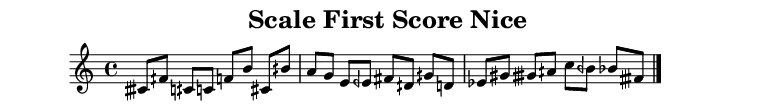

In [ ]:
pynicescale = music21.converter.parse('scaleFirstScoreNicePyComposition.xml')
play(pynicescale)
show(pynicescale)

In [ ]:
#Unordered scale of the whole piece// pitch values without repetition and on the same octave
ppp = converter.parse('scaleFirstScoreNicePyComposition.xml')
#ppp.show()

In [ ]:
#Sorting the list
mylist10 = (zz)
mylist9.sort()
#print(mylist9)


In [ ]:
stream3 = stream.Stream()

thisNote7 = []
for thisPitch in mylist9:

    thisNote8 = note.Note(thisPitch)
    thisNote7.append(thisNote8)

    stream3.append(note.Note(thisPitch, quarterLength=0.5))
    stream3.write('musicxml', fp='scaleNiceSortedPyComposition.xml')




In [ ]:
scaleFirstScoreSorted= stream.Score()
scaleFirstScoreSorted.append([stream3])


scaleFirstScoreSorted.insert(0, metadata.Metadata())
scaleFirstScoreSorted.metadata.title = 'Scale First Score Sorted Nice PyComposition'
scaleFirstScoreSorted.metadata.composer = 'Data'
#scaleFirstScoreSorted.show()

#scaleFirstScoreSorted.show('midi')
scaleFirstScoreSorted.write('musicxml', fp='scaleFirstScoreSortedNicePyComposition.xml')

'/content/scaleFirstScoreSortedNicePyComposition.xml'

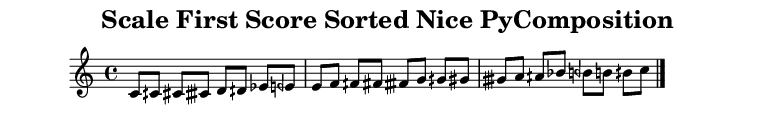

In [ ]:
pynicescalesorted = music21.converter.parse('scaleFirstScoreSortedNicePyComposition.xml')
play(pynicescalesorted)
show(pynicescalesorted)

In [ ]:
#Scale in ascending order // pitch values without repetition and in the same octave
ppqr = converter.parse('scaleFirstScoreSortedNicePyComposition.xml')
#ppqr.show()


In [ ]:
#How many times each note appears

manyTimes = [Counter(mylist3)]

print(manyTimes)


[Counter({36.5: 78, 36.0: 63, 37.0: 53, 45.0: 14, 44.5: 12, 44.0: 10, 41.0: 9, 41.5: 6, 37.5: 5, 42.0: 5, 43.5: 5, 45.5: 5, 48.0: 2, 47.0: 2, 43.0: 2, 40.0: 2, 38.0: 2, 39.0: 2, 48.5: 1, 47.5: 1, 39.5: 1, 38.5: 1, 72.0: 1, 71.5: 1, 70.5: 1, 70.0: 1, 69.0: 1, 66.5: 1, 61.0: 1})]


In [ ]:
#Most common 5 notes, and how many times they appear

counting = Counter(mylist3).most_common(5)
print(counting)


[(36.5, 78), (36.0, 63), (37.0, 53), (45.0, 14), (44.5, 12)]


In [ ]:
#Most common 5 notes in ascending order regarding how many times ther appear
countings = (counting[0][0], counting[1][0], counting[2][0], counting[3][0], counting[4][0])
print(countings)

aCount = list(countings)

#print(type(aCount))

#print(aCount)

(36.5, 36.0, 37.0, 45.0, 44.5)


In [ ]:

stream122 = stream.Stream()

thisNote155 = []
for aaCount in aCount:

    thisNote166 = note.Note(aaCount)
    thisNote155.append(thisNote166)

    stream122.append(note.Note(aaCount, quarterLength=0.5))

    stream122.write('musicxml', fp='AcountingsNicePyComposition.xml')
    #stream12.show()


In [ ]:
mostCommonFive= stream.Score()
mostCommonFive.append([stream122])


mostCommonFive.insert(0, metadata.Metadata())
mostCommonFive.metadata.title = 'Most Common Five Notes Nice PyComposition'
mostCommonFive.metadata.composer = 'Data'
#mostCommonFive.show()

#mostCommonFive.show('midi')
mostCommonFive.write('musicxml', fp='mostCommonFiveNicePyComposition.xml')

'/content/mostCommonFiveNicePyComposition.xml'

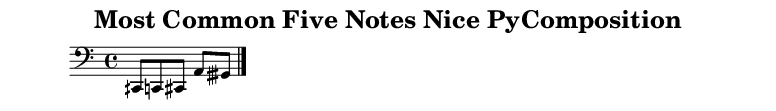

In [ ]:
pynicecommon5 = music21.converter.parse('mostCommonFiveNicePyComposition.xml')
play(pynicecommon5)
show(pynicecommon5)

In [ ]:
#Five most common notes, sort
ppwo = converter.parse('mostCommonFiveNicePyComposition.xml')
#ppwo.show()


In [ ]:
#Getting most common 5 durations
manyTimesR = [Counter(durationValuesRoundedAllDurations)]

print(manyTimesR)

[Counter({0.125: 59, 0.0: 57, 0.25: 45, 0.375: 36, 2.875: 12, 3.0: 11, 1.75: 7, 3.125: 7, 1.625: 6, 2.625: 6, 2.0: 5, 2.5: 5, 2.75: 5, 1.125: 3, 0.5: 2, 4.125: 2, 3.875: 2, 1.875: 2, 2.375: 2, 0.75: 2, 3.75: 1, 3.625: 1, 1.375: 1, 1.25: 1, 0.625: 1, 12.0: 1, 11.875: 1, 11.5: 1, 11.375: 1, 11.0: 1, 10.125: 1, 8.25: 1})]


In [ ]:
#Most common 5 durations, and how manny times they appear

countingR = Counter(durationValuesRoundedAllDurations).most_common(5)
print(countingR)


[(0.125, 59), (0.0, 57), (0.25, 45), (0.375, 36), (2.875, 12)]


In [ ]:
countingsR = (countingR[0][0], countingR[1][0], countingR[2][0], countingR[3][0], countingR[4][0])
print(countingsR)

aCountR = list(countingsR)

#print(type(aCount))
#print(aCount)

(0.125, 0.0, 0.25, 0.375, 2.875)


In [ ]:

stream122R = stream.Stream()

thisNote155R = []
for aaCountR in aCountR:

    thisNote166R = note.Note(aaCountR)
    thisNote155R.append(thisNote166R)

    stream122R.append(note.Note(60, quarterLength=aaCountR))

    stream122R.write('musicxml', fp='AcountingsRNice.xml')
    #stream12.show()

meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 2 of 
[None, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


In [ ]:
mostCommonFiveDurations= stream.Score()
mostCommonFiveDurations.append([stream122R])


mostCommonFiveDurations.insert(0, metadata.Metadata())
mostCommonFiveDurations.metadata.title = 'Most Common Five Durations Nice PyComposition'
mostCommonFiveDurations.metadata.composer = 'Data'
#mostCommonFiveDurations.show()

#mostCommonFiveDurations.show('midi')
mostCommonFiveDurations.write('musicxml', fp='mostCommonFiveDurationsNicePyComposition.xml')

'/content/mostCommonFiveDurationsNicePyComposition.xml'

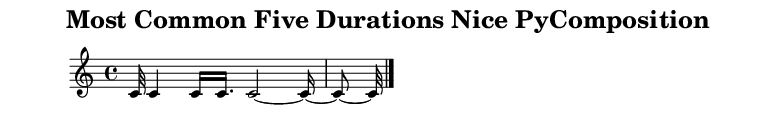

In [ ]:
pynicecommon5durations = music21.converter.parse('mostCommonFiveDurationsNicePyComposition.xml')
play(pynicecommon5durations)
show(pynicecommon5durations)

In [ ]:
#Five most common durations, sorted
ppwoR = converter.parse('AcountingsRNice.xml')
#ppwoR.show()

In [ ]:
#Amount of elements in pitch values
numberList3 = len(mylist3)
print(numberList3)


288


In [ ]:
#Pitch values
print(mylist3)

[37.5, 41.5, 36.5, 36.5, 48.0, 36.5, 37.5, 41.0, 36.5, 36.0, 48.5, 36.5, 37.5, 41.0, 36.5, 36.0, 48.0, 36.0, 37.5, 41.0, 36.5, 36.0, 47.0, 36.0, 37.0, 41.0, 36.5, 36.0, 47.5, 36.0, 37.0, 41.0, 36.5, 36.0, 47.0, 36.0, 37.0, 41.5, 36.5, 36.0, 45.0, 36.0, 37.0, 41.5, 36.5, 36.0, 43.0, 36.0, 37.0, 41.5, 36.5, 36.0, 40.0, 36.0, 37.0, 41.5, 36.0, 36.0, 39.5, 36.0, 37.0, 42.0, 36.5, 36.0, 38.5, 36.0, 37.0, 42.0, 36.5, 36.0, 37.0, 36.0, 37.0, 42.0, 36.5, 36.0, 37.5, 36.0, 37.0, 42.0, 36.5, 36.0, 36.5, 36.0, 37.0, 43.0, 36.5, 36.0, 37.0, 36.0, 37.0, 43.5, 36.5, 36.5, 38.0, 36.0, 37.0, 43.5, 36.5, 36.5, 39.0, 36.0, 37.0, 43.5, 36.5, 36.5, 41.0, 36.0, 37.0, 44.0, 36.0, 36.5, 43.5, 36.0, 37.0, 44.0, 36.5, 36.5, 45.0, 36.0, 37.0, 44.5, 36.5, 36.5, 45.5, 36.0, 37.0, 44.5, 36.5, 36.5, 44.0, 36.0, 37.0, 44.5, 36.5, 36.5, 43.5, 36.0, 37.0, 44.5, 36.5, 36.5, 44.0, 36.0, 37.0, 44.5, 36.5, 36.5, 44.0, 36.0, 37.0, 44.5, 36.5, 36.5, 44.0, 36.0, 37.0, 45.0, 36.5, 36.5, 44.5, 36.0, 37.0, 45.0, 36.5, 36.5, 41.

In [ ]:
#Force to get into octave number 4 (1)
krz = []
for i in mylist3:
    while i < 60:
        #print(i)
        i += 12
    else:
        #print('Loop ended, i =', i)
        #print(i)
        krz.append(i)

mylist87 = krz

In [ ]:
#Force to get into octave number 4 (2)
kzz = []
for i in mylist87:
    while i > 72:

        i -= 12
    else:

        #print(i)

        kzz.append(i)

mylist78 = kzz


In [ ]:
divisionvalue = int(numberList3 / 6)

In [ ]:
#Division into 6 parts, in accordance with the number of parameters used; values still not sorted

from itertools import zip_longest
def grouper(iterable, n, fillvalue=None):
    args = [iter(iterable)] * n
    return zip_longest(*args, fillvalue=fillvalue)


sublist33 = (list(grouper(mylist78, divisionvalue)))
print(sublist33[5])


(61.0, 68.5, 60.5, 60.5, 61.0, 60.0, 61.0, 68.5, 60.5, 60.5, 72.0, 60.0, 61.0, 69.0, 60.5, 60.5, 71.5, 60.0, 60.5, 69.0, 60.5, 60.5, 70.5, 60.0, 60.5, 69.0, 60.5, 60.5, 70.0, 60.0, 61.0, 68.5, 60.5, 60.5, 69.0, 60.0, 61.0, 68.0, 60.5, 60.5, 66.5, 60.0, 61.0, 68.0, 60.0, 60.5, 61.0, 60.0)


In [ ]:
subListA = list(sublist33[0])
subListB = list(sublist33[1])
subListC = list(sublist33[2])
subListD = list(sublist33[3])
subListE = list(sublist33[4])
subListF = list(sublist33[5])
print(subListE)

[61.0, 69.0, 60.5, 60.5, 66.0, 60.0, 61.0, 69.0, 61.0, 60.5, 65.0, 60.0, 61.0, 69.5, 61.0, 60.5, 64.0, 60.0, 61.0, 69.0, 61.0, 60.5, 61.0, 60.0, 61.0, 68.5, 60.5, 60.5, 63.0, 60.0, 61.0, 68.5, 60.5, 60.5, 65.0, 60.0, 61.0, 69.0, 60.5, 60.5, 62.0, 60.0, 61.0, 69.0, 60.5, 60.5, 61.0, 60.0]


In [ ]:
#Pitch values without repetitions in first part, or partA
subListAA = list(dict.fromkeys(subListA))
print(subListAA)

[61.5, 65.5, 60.5, 60.0, 65.0, 71.0, 61.0, 71.5, 69.0, 67.0]


In [ ]:
#First part pitch values ordered
mylistA = (subListAA)

mylistA.sort()
print(mylistA)



[60.0, 60.5, 61.0, 61.5, 65.0, 65.5, 67.0, 69.0, 71.0, 71.5]


In [ ]:
stream222 = stream.Stream()


thisNote55 = []
for thisPitch in mylistA:

    thisNote88 = note.Note(thisPitch)
    thisNote55.append(thisNote88)

    stream222.append(note.Note(thisPitch, quarterLength=0.5))
    stream222.write('musicxml', fp='fragmentANicePyComposition.xml')



In [ ]:
firstPartScale= stream.Score()
firstPartScale.append([stream222])


firstPartScale.insert(0, metadata.Metadata())
firstPartScale.metadata.title = 'First Part Scale Nice PyComposition'
firstPartScale.metadata.composer = 'Data'
#firstPartScale.show()

#firstPartScale.show('midi')
firstPartScale.write('musicxml', fp='firstPartScaleNicePyComposition.xml')

'/content/firstPartScaleNicePyComposition.xml'

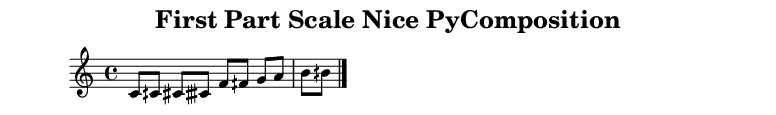

In [ ]:
pynicefirstscale = music21.converter.parse('firstPartScaleNicePyComposition.xml')
play(pynicefirstscale)
show(pynicefirstscale)

In [ ]:
#First part scale
pp = converter.parse('fragmentANicePyComposition.xml')
#pp.show()

In [ ]:
#Pitch values without repetitions in second part, or partB
subListBB = list(dict.fromkeys(subListB))
print(subListBB)

[61.0, 65.5, 60.5, 60.0, 64.0, 63.5, 66.0, 62.5, 61.5, 67.0, 67.5, 62.0]


In [ ]:
#Second part pitch values ordered
mylistB = (subListBB)

mylistB.sort()
print(mylistB)



[60.0, 60.5, 61.0, 61.5, 62.0, 62.5, 63.5, 64.0, 65.5, 66.0, 67.0, 67.5]


In [ ]:
stream2222 = stream.Stream()


thisNote555 = []
for thisPitch in mylistB:

    thisNote888 = note.Note(thisPitch)
    thisNote555.append(thisNote888)

    stream2222.append(note.Note(thisPitch, quarterLength=0.5))
    stream2222.write('musicxml', fp='fragmentBNicePyComposition.xml')



In [ ]:
secondPartScale= stream.Score()
secondPartScale.append([stream2222])


secondPartScale.insert(0, metadata.Metadata())
secondPartScale.metadata.title = 'Second Part Scale Nice PyComposition'
secondPartScale.metadata.composer = 'Data'
#secondPartScale.show()

#secondPartScale.show('midi')
secondPartScale.write('musicxml', fp='secondPartScaleNicePyComposition.xml')

'/content/secondPartScaleNicePyComposition.xml'

In [ ]:
#Second part scale
pp123 = converter.parse('fragmentBNicePyComposition.xml')
#pp123.show()

In [ ]:
#Pitch values without repetitions in third part, or partC
subListCC = list(dict.fromkeys(subListC))
print(subListCC)

[61.0, 67.5, 60.5, 63.0, 60.0, 65.0, 68.0, 69.0, 68.5, 69.5]


In [ ]:
#Third part pitch values ordered
mylistC = (subListCC)

mylistC.sort()
print(mylistC)



[60.0, 60.5, 61.0, 63.0, 65.0, 67.5, 68.0, 68.5, 69.0, 69.5]


In [ ]:
stream22222 = stream.Stream()


thisNote5555 = []
for thisPitch in mylistC:

    thisNote8888 = note.Note(thisPitch)
    thisNote5555.append(thisNote8888)

    stream22222.append(note.Note(thisPitch, quarterLength=0.5))
    stream22222.write('musicxml', fp='fragmentCNicePyComposition.xml')


In [ ]:
thirdPartScale= stream.Score()
thirdPartScale.append([stream22222])


thirdPartScale.insert(0, metadata.Metadata())
thirdPartScale.metadata.title = 'Third Part Scale Nice PyComposition'
thirdPartScale.metadata.composer = 'Data'
#thirdPartScale.show()

#thirdPartScale.show('midi')
thirdPartScale.write('musicxml', fp='thirdPartScaleNicePyComposition.xml')

'/content/thirdPartScaleNicePyComposition.xml'

In [ ]:
#Third part scale
pp456 = converter.parse('fragmentCNicePyComposition.xml')
#pp456.show()

In [ ]:
#Pitch values without repetitions in fourth part, or partD
subListDD = list(dict.fromkeys(subListD))
print(subListDD)

[61.0, 68.5, 60.5, 68.0, 60.0, 69.0, 65.5, 69.5, 65.0]


In [ ]:
#Fourth part pitch values ordered
mylistD = (subListDD)

mylistD.sort()
print(mylistD)



[60.0, 60.5, 61.0, 65.0, 65.5, 68.0, 68.5, 69.0, 69.5]


In [ ]:
stream222223 = stream.Stream()

thisNote55553 = []
for thisPitch in mylistD:

    thisNote88883 = note.Note(thisPitch)
    thisNote55553.append(thisNote88883)

    stream222223.append(note.Note(thisPitch, quarterLength=0.5))
    stream222223.write('musicxml', fp='fragmentDNicePyComposition.xml')





In [ ]:
fourthPartScale= stream.Score()
fourthPartScale.append([stream222223])


fourthPartScale.insert(0, metadata.Metadata())
fourthPartScale.metadata.title = 'Fourth Part Scale Nice PyComposition'
fourthPartScale.metadata.composer = 'Data'
#fourthPartScale.show()

#fourthPartScale.show('midi')
fourthPartScale.write('musicxml', fp='fourthPartScaleNicePyComposition.xml')

'/content/fourthPartScaleNicePyComposition.xml'

In [ ]:
#Fourth part scale
pp678 = converter.parse('fragmentDNicePyComposition.xml')
#pp678.show()

In [ ]:
#Pitch values without repetitions in fifth part, or partE
subListEE = list(dict.fromkeys(subListE))
print(subListEE)

[61.0, 69.0, 60.5, 66.0, 60.0, 65.0, 69.5, 64.0, 68.5, 63.0, 62.0]


In [ ]:
#Fifth part pitch values ordered
mylistE = (subListEE)

mylistE.sort()
print(mylistE)



[60.0, 60.5, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 68.5, 69.0, 69.5]


In [ ]:
stream2222233 = stream.Stream()


thisNote555533 = []
for thisPitch in mylistE:

    thisNote888833 = note.Note(thisPitch)
    thisNote555533.append(thisNote888833)

    stream2222233.append(note.Note(thisPitch, quarterLength=0.5))
    stream2222233.write('musicxml', fp='fragmentENicePyComposition.xml')



In [ ]:
fifthPartScale= stream.Score()
fifthPartScale.append([stream2222233])


fifthPartScale.insert(0, metadata.Metadata())
fifthPartScale.metadata.title = 'Fifth Part Scale Nice PyComposition'
fifthPartScale.metadata.composer = 'Data'
#fifthPartScale.show()

#fifthPartScale.show('midi')
fifthPartScale.write('musicxml', fp='fifthPartScaleNicePyComposition.xml')

'/content/fifthPartScaleNicePyComposition.xml'

In [ ]:
#Fifth part scale
pp789 = converter.parse('fragmentENicePyComposition.xml')
#pp789.show()

In [ ]:
#Pitch values without repetitions in sixth part, or partF
subListFF = list(dict.fromkeys(subListF))
#subListFF.remove(None)
print(subListFF)

[61.0, 68.5, 60.5, 60.0, 72.0, 69.0, 71.5, 70.5, 70.0, 68.0, 66.5]


In [ ]:
#Sixth part pitch values ordered
mylistF = (subListFF)

mylistF.sort()
print(mylistF)



[60.0, 60.5, 61.0, 66.5, 68.0, 68.5, 69.0, 70.0, 70.5, 71.5, 72.0]


In [ ]:
stream22222333 = stream.Stream()

thisNote5555333 = []
for thisPitch in mylistF:

    thisNote8888333 = note.Note(thisPitch)
    thisNote5555333.append(thisNote8888333)

    stream22222333.append(note.Note(thisPitch, quarterLength=0.5))
    stream22222333.write('musicxml', fp='fragmentFNicePyComposition.xml')



In [ ]:
sixthPartScale= stream.Score()
sixthPartScale.append([stream22222333])


sixthPartScale.insert(0, metadata.Metadata())
sixthPartScale.metadata.title = 'Sixth Part Scale Nice PyComposition'
sixthPartScale.metadata.composer = 'Data'
#sixthPartScale.show()

#sixthPartScale.show('midi')
sixthPartScale.write('musicxml', fp='sixthPartScaleNicePyComposition.xml')

'/content/sixthPartScaleNicePyComposition.xml'

In [ ]:
#Sixth part scale
pp901 = converter.parse('fragmentFNicePyComposition.xml')
#pp901.show()

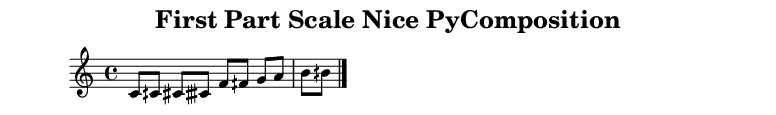

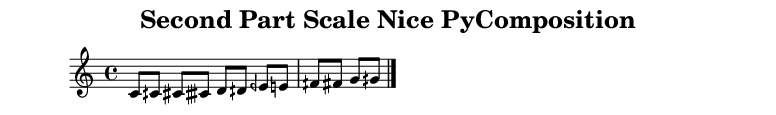

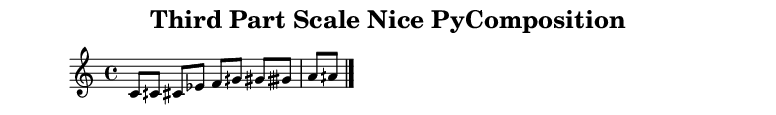

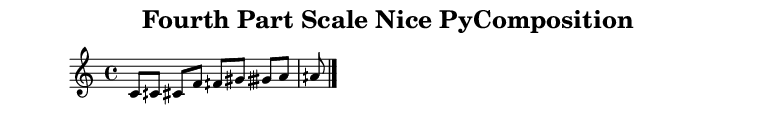

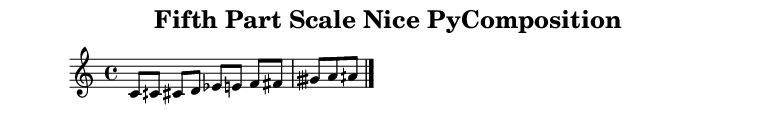

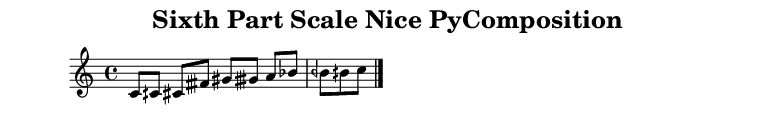

In [ ]:
pynicefirstscale = music21.converter.parse('firstPartScaleNicePyComposition.xml')
play(pynicefirstscale)
show(pynicefirstscale)
pynicesecondscale = music21.converter.parse('secondPartScaleNicePyComposition.xml')
play(pynicesecondscale)
show(pynicesecondscale)
pynicethirdscale = music21.converter.parse('thirdPartScaleNicePyComposition.xml')
play(pynicethirdscale)
show(pynicethirdscale)
pynicefourthscale = music21.converter.parse('fourthPartScaleNicePyComposition.xml')
play(pynicefourthscale)
show(pynicefourthscale)
pynicefifthscale = music21.converter.parse('fifthPartScaleNicePyComposition.xml')
play(pynicefifthscale)
show(pynicefifthscale)
pynicesixthscale = music21.converter.parse('sixthPartScaleNicePyComposition.xml')
play(pynicesixthscale)
show(pynicesixthscale)

## 🎶 Transpositions
We transpose the score to different intervals to produce new harmonic variations.


In [ ]:
# Transposition sur les  5 notes principales :

print(aCount)

[36.5, 36.0, 37.0, 45.0, 44.5]


In [ ]:
#Calculate transposition interval
interval_value_1 = (mylist3[0] - aCount[0])
interval_value_2 = (mylist3[0] - aCount[1])
interval_value_3 = (mylist3[0] - aCount[2])
interval_value_4 = (mylist3[0] - aCount[3])
interval_value_5 = (mylist3[0] - aCount[4])

print(interval_value_1)
print(interval_value_2)
print(interval_value_3)
print(interval_value_4)
print(interval_value_5)


1.0
1.5
0.5
-7.5
-7.0


In [ ]:
interval_1 = interval.Interval(interval_value_1)
interval_2 = interval.Interval(interval_value_2)
interval_3 = interval.Interval(interval_value_3)
interval_4 = interval.Interval(interval_value_4)
interval_5 = interval.Interval(interval_value_5)

In [ ]:
ssss.isWellFormedNotation()

True

In [ ]:
#First transposition
#Ignore the  message warnings.warn

xrtz = stream.Stream(ssss).transpose(interval_1)
#xrtz.show()

firstTransposition= stream.Score()
firstTransposition.append([xrtz])


firstTransposition.insert(0, metadata.Metadata())
firstTransposition.metadata.title = 'First Transposition Nice PyComposition'
firstTransposition.metadata.composer = 'Data'
#firstTransposition.show()

#firstTransposition.show('midi')
firstTransposition.write('musicxml', fp='firstTranspositionNicePyComposition.xml')


'/content/firstTranspositionNicePyComposition.xml'

In [ ]:
#Second Transposition

xrtzz = stream.Stream(ssss).transpose(interval_2)
#xrtzz.show()

secondTransposition= stream.Score()
secondTransposition.append([xrtzz])


secondTransposition.insert(0, metadata.Metadata())
secondTransposition.metadata.title = 'Second Transposition Nice PyComposition'
secondTransposition.metadata.composer = 'Data'
#secondTransposition.show()

#secondTransposition.show('midi')
secondTransposition.write('musicxml', fp='secondTranspositionNicePyComposition.xml')

'/content/secondTranspositionNicePyComposition.xml'

In [ ]:
#Third Transposition

xrttzz = stream.Stream(ssss).transpose(interval_3)
#xrttzz.show()

thirdTransposition= stream.Score()
thirdTransposition.append([xrttzz])


thirdTransposition.insert(0, metadata.Metadata())
thirdTransposition.metadata.title = 'Third Transposition Nice PyComposition'
thirdTransposition.metadata.composer = 'Data'
#thirdTransposition.show()

#thirdTransposition.show('midi')
thirdTransposition.write('musicxml', fp='thirdTranspositionNicePyComposition.xml')

'/content/thirdTranspositionNicePyComposition.xml'

In [ ]:
#Fourth Transposition

xrrtzz = stream.Stream(ssss).transpose(interval_4)
#xrrtzz.show()


fourthTransposition= stream.Score()
fourthTransposition.append([xrrtzz])


fourthTransposition.insert(0, metadata.Metadata())
fourthTransposition.metadata.title = 'Fourth Transposition Nice PyComposition'
fourthTransposition.metadata.composer = 'Data'
#fourthTransposition.show()

#fourthTransposition.show('midi')
fourthTransposition.write('musicxml', fp='fourthTranspositionNicePyComposition.xml')


'/content/fourthTranspositionNicePyComposition.xml'

In [ ]:
#Fifth Transposition

xxrtzz = stream.Stream(ssss).transpose(interval_5)
#xxrtzz.show()


fifthTransposition= stream.Score()
fifthTransposition.append([xxrtzz])


fifthTransposition.insert(0, metadata.Metadata())
fifthTransposition.metadata.title = 'Fifth Transposition Nice PyComposition'
fifthTransposition.metadata.composer = 'Data'
#fifthTransposition.show()

#fifthTransposition.show('midi')
fifthTransposition.write('musicxml', fp='fifthTranspositionNicePyComposition.xml')

'/content/fifthTranspositionNicePyComposition.xml'

In [ ]:
#Verify list length to build up the chords
print(len(mylistA))

10


## 🎶 Melody and Harmony construction  
We structure the composition, harmonizing the weather-generated melodies and layering different musical voices.


In [ ]:
#Chords part A


drtg0FF1 = random.randrange(0, len(durationValuesRoundedAllDurations))
drtg0FF2 = random.randrange(0, len(durationValuesRoundedAllDurations))

chord1 = chord.Chord([pitch.Pitch(mylistA[0]), pitch.Pitch(mylistA[2]), pitch.Pitch(mylistA[4])])
chord2 = chord.Chord([pitch.Pitch(mylistA[1]), pitch.Pitch(mylistA[3]), pitch.Pitch(mylistA[5])])

chord1.duration.quarterLength = (durationValuesRoundedAllDurations[drtg0FF1])
chord2.duration.quarterLength = (durationValuesRoundedAllDurations[drtg0FF2])

s321 = stream.Score()

st123 = stream.Stream()
st123.append(chord1)
st123.append(chord2)
s321.append(st123)

s321.insert(0, metadata.Metadata())
s321.metadata.title = 'Chords A Nice PyComposition'
s321.metadata.composer = 'Data'
#s321.show()
#s321.show('midi')

s321.write('musicxml', fp='chordsANicePyComposition.xml')


'/content/chordsANicePyComposition.xml'

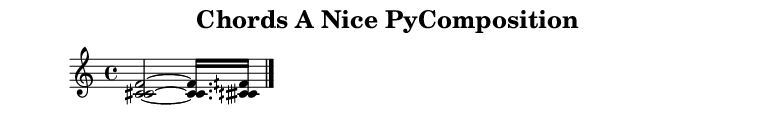

In [ ]:
pyniceChordsA = music21.converter.parse('chordsANicePyComposition.xml')
play(pyniceChordsA)
show(pyniceChordsA)

In [ ]:
chordsAfile = converter.parse('chordsANicePyComposition.xml')
#chordsAfile.show()

In [ ]:
print(len(mylistB))

12


In [ ]:
#Chords part B

drtg0FF11 = random.randrange(0, len(durationValuesRoundedAllDurations))
drtg0FF22 = random.randrange(0, len(durationValuesRoundedAllDurations))

chord11 = chord.Chord([pitch.Pitch(mylistB[0]), pitch.Pitch(mylistB[6]), pitch.Pitch(mylistB[9])])
chord21 = chord.Chord([pitch.Pitch(mylistB[1]), pitch.Pitch(mylistB[7]), pitch.Pitch(mylistB[10])])

chord11.duration.quarterLength = (durationValuesRoundedAllDurations[drtg0FF11])
chord21.duration.quarterLength = (durationValuesRoundedAllDurations[drtg0FF22])

s3211 = stream.Score()

st1231 = stream.Stream()
st1231.append(chord11)
st1231.append(chord21)
s3211.append(st1231)

s3211.insert(0, metadata.Metadata())
s3211.metadata.title = 'Chords B Nice PyComposition'
s3211.metadata.composer = 'Data'
#s3211.show()
#s3211.show('midi')

s3211.write('musicxml', fp='chordsBNicePyComposition.xml')


'/content/chordsBNicePyComposition.xml'

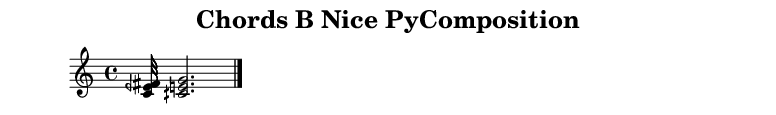

In [ ]:
pyniceChordsB = music21.converter.parse('chordsBNicePyComposition.xml')
play(pyniceChordsB)
show(pyniceChordsB)

In [ ]:
chordsBfile = converter.parse('chordsBNicePyComposition.xml')
#chordsBfile.show()

In [ ]:
print(len(mylistC))

10


In [ ]:
#Chords part C

drtg0FF111 = random.randrange(0, len(durationValuesRoundedAllDurations))
drtg0FF222 = random.randrange(0, len(durationValuesRoundedAllDurations))

chord111 = chord.Chord([pitch.Pitch(mylistC[0]), pitch.Pitch(mylistC[5]), pitch.Pitch(mylistC[8])])
chord211 = chord.Chord([pitch.Pitch(mylistC[3]), pitch.Pitch(mylistC[6]), pitch.Pitch(mylistC[9])])

chord111.duration.quarterLength = (durationValuesRoundedAllDurations[drtg0FF111])
chord211.duration.quarterLength = (durationValuesRoundedAllDurations[drtg0FF222])

s32111 = stream.Score()

st12311 = stream.Stream()
st12311.append(chord111)
st12311.append(chord211)
s32111.append(st12311)

s32111.insert(0, metadata.Metadata())
s32111.metadata.title = 'Chords C Nice PyComposition'
s32111.metadata.composer = 'Data'
#s32111.show()
#s32111.show('midi')

s32111.write('musicxml', fp='chordsCNicePyComposition.xml')


'/content/chordsCNicePyComposition.xml'

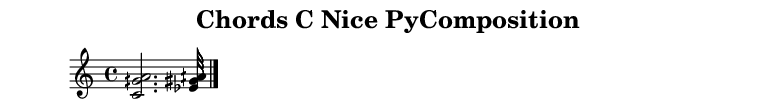

In [ ]:
pyniceChordsC = music21.converter.parse('chordsCNicePyComposition.xml')
play(pyniceChordsC)
show(pyniceChordsC)

In [ ]:
chordsCfile = converter.parse('chordsCNicePyComposition.xml')
#chordsCfile.show()

In [ ]:
print(len(mylistD))

9


In [ ]:
#Chords part D

drtg0FF1111 = random.randrange(0, len(durationValuesRoundedAllDurations))
drtg0FF2222 = random.randrange(0, len(durationValuesRoundedAllDurations))


chord11D = chord.Chord([pitch.Pitch(mylistD[1]), pitch.Pitch(mylistD[4]), pitch.Pitch(mylistD[6])])
chord21D = chord.Chord([pitch.Pitch(mylistD[2]), pitch.Pitch(mylistD[3]), pitch.Pitch(mylistD[8])])


#ADAPT TO THE AMOUNT OF NOTES / AUTOMATIZE, OR TAKE OUT  THE ZEROS FROM THE LIST (!)

chord11D.duration.quarterLength = (durationValuesRoundedAllDurations[drtg0FF1111])
chord21D.duration.quarterLength = (durationValuesRoundedAllDurations[drtg0FF2222])

s3211D = stream.Score()

st1231D = stream.Stream()
st1231D.append(chord11D)
st1231D.append(chord21D)
s3211D.append(st1231D)

s3211D.insert(0, metadata.Metadata())
s3211D.metadata.title = 'Chords D Nice PyComposition'
s3211D.metadata.composer = 'Data'
#s3211D.show()
#s3211D.show('midi')

s3211D.write('musicxml', fp='chordsDNicePyComposition.xml')


'/content/chordsDNicePyComposition.xml'

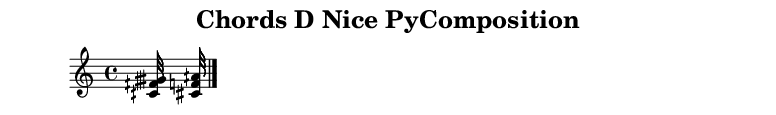

In [ ]:
pyniceChordsD = music21.converter.parse('chordsDNicePyComposition.xml')
play(pyniceChordsD)
show(pyniceChordsD)

In [ ]:
chordsDfile = converter.parse('chordsDNicePyComposition.xml')
#chordsDfile.show()

In [ ]:
print(len(mylistE))

11


In [ ]:
#Chords part E

drtg0FF11111 = random.randrange(0, len(durationValuesRoundedAllDurations))
drtg0FF22222 = random.randrange(0, len(durationValuesRoundedAllDurations))



chord11E = chord.Chord([pitch.Pitch(mylistE[4]), pitch.Pitch(mylistE[7]), pitch.Pitch(mylistE[9])])
chord21E = chord.Chord([pitch.Pitch(mylistE[3]), pitch.Pitch(mylistE[6]), pitch.Pitch(mylistE[10])])

chord11E.duration.quarterLength = (durationValuesRoundedAllDurations[drtg0FF11111])
chord21E.duration.quarterLength = (durationValuesRoundedAllDurations[drtg0FF22222])

s3211E = stream.Score()

st1231E = stream.Stream()
st1231E.append(chord11E)
st1231E.append(chord21E)
s3211E.append(st1231E)

s3211E.insert(0, metadata.Metadata())
s3211E.metadata.title = 'Chords E Nice PyComposition'
s3211E.metadata.composer = 'Data'
#s3211E.show()
#s3211E.show('midi')

s3211E.write('musicxml', fp='chordsENicePyComposition.xml')


'/content/chordsENicePyComposition.xml'

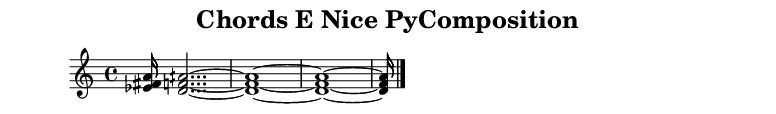

In [ ]:
pyniceChordsE = music21.converter.parse('chordsENicePyComposition.xml')
play(pyniceChordsE)
show(pyniceChordsE)

In [ ]:
chordsEfile = converter.parse('chordsENicePyComposition.xml')
#chordsEfile.show()

In [ ]:
print(len(mylistF))

11


In [ ]:
#Chords part F

drtg0FF111111 = random.randrange(0, len(durationValuesRoundedAllDurations))
drtg0FF222222 = random.randrange(0, len(durationValuesRoundedAllDurations))


chord11F = chord.Chord([pitch.Pitch(mylistF[2]), pitch.Pitch(mylistF[4]), pitch.Pitch(mylistF[9])])
chord21F = chord.Chord([pitch.Pitch(mylistF[2]), pitch.Pitch(mylistF[7]), pitch.Pitch(mylistF[10])])

chord11F.duration.quarterLength = (durationValuesRoundedAllDurations[drtg0FF111111])
chord21F.duration.quarterLength = (durationValuesRoundedAllDurations[drtg0FF222222])

s3211F = stream.Score()

st1231F = stream.Stream()
st1231F.append(chord11F)
st1231F.append(chord21F)
s3211F.append(st1231F)

s3211F.insert(0, metadata.Metadata())
s3211F.metadata.title = 'Chords F Nice PyComposition'
s3211F.metadata.composer = 'Data'
#s3211F.show()
#s3211F.show('midi')

s3211F.write('musicxml', fp='chordsFNicePyComposition.xml')


'/content/chordsFNicePyComposition.xml'

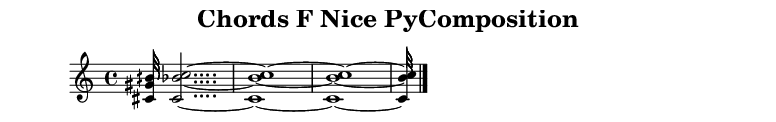

In [ ]:
pyniceChordsF = music21.converter.parse('chordsFNicePyComposition.xml')
play(pyniceChordsF)
show(pyniceChordsF)

In [ ]:
chordsFfile = converter.parse('chordsFNicePyComposition.xml')
#chordsFfile.show()

In [ ]:
#Creating melodies,  part A

#Random pitches, within the part A notes
frtg0 = random.randrange(0, len(mylistA))
frtg1 = random.randrange(0, len(mylistA))
frtg2 = random.randrange(0, len(mylistA))
frtg3 = random.randrange(0, len(mylistA))
frtg4 = random.randrange(0, len(mylistA))
frtg5 = random.randrange(0, len(mylistA))


#Random durations from list
drtg0 = random.randrange(0, len(durationValuesRoundedAllDurations))
drtg1 = random.randrange(0, len(durationValuesRoundedAllDurations))
drtg2 = random.randrange(0, len(durationValuesRoundedAllDurations))
drtg3 = random.randrange(0, len(durationValuesRoundedAllDurations))
drtg4 = random.randrange(0, len(durationValuesRoundedAllDurations))
drtg5 = random.randrange(0, len(durationValuesRoundedAllDurations))

#############################
sMelA = stream.Score()

sAmel = stream.Stream()

sAmel.append(note.Note((mylistA[frtg0]), quarterLength=(durationValuesRoundedAllDurations[drtg0])))
sAmel.append(note.Note((mylistA[frtg1]), quarterLength=(durationValuesRoundedAllDurations[drtg1])))
sAmel.append(note.Note((mylistA[frtg2]), quarterLength=(durationValuesRoundedAllDurations[drtg2])))
sAmel.append(note.Note((mylistA[frtg3]), quarterLength=(durationValuesRoundedAllDurations[drtg3])))
sAmel.append(note.Note((mylistA[frtg2]), quarterLength=(durationValuesRoundedAllDurations[drtg4])))
sAmel.append(note.Note((mylistA[frtg0]), quarterLength=(durationValuesRoundedAllDurations[drtg5])))
sMelA.append(sAmel)

sMelA.insert(0, metadata.Metadata())
sMelA.metadata.title = 'Melodies A Nice PyComposition'
sMelA.metadata.composer = 'Data'
#sMelA.show()
#sMelA.show('midi')

sMelA.write('musicxml', fp='melosANicePyComposition.xml')

print(mylistA[frtg0], mylistA[frtg1], mylistA[frtg2], mylistA[frtg3], mylistA[frtg4], mylistA[frtg5])

###############################

71.5 61.0 65.0 65.0 69.0 61.0


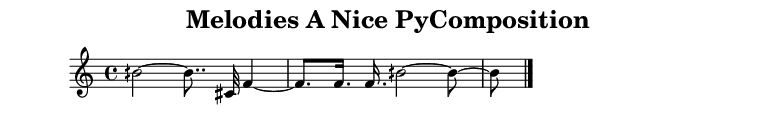

In [ ]:
pynicemelosA = music21.converter.parse('melosANicePyComposition.xml')
play(pynicemelosA)
show(pynicemelosA)

In [ ]:
MelodyAfile = converter.parse('melosANicePyComposition.xml')
#MelodyAfile.show()

In [ ]:
#Creating melodies,  part B

#Random pitches, within the part B notes
frtg0B = random.randrange(0, len(mylistB))
frtg1B = random.randrange(0, len(mylistB))
frtg2B = random.randrange(0, len(mylistB))
frtg3B = random.randrange(0, len(mylistB))
frtg4B = random.randrange(0, len(mylistB))
frtg5B = random.randrange(0, len(mylistB))


#Random durations from list
drtg0B = random.randrange(0, len(durationValuesRoundedAllDurations))
drtg1B = random.randrange(0, len(durationValuesRoundedAllDurations))
drtg2B = random.randrange(0, len(durationValuesRoundedAllDurations))
drtg3B = random.randrange(0, len(durationValuesRoundedAllDurations))
drtg4B = random.randrange(0, len(durationValuesRoundedAllDurations))
drtg5B = random.randrange(0, len(durationValuesRoundedAllDurations))

#############################
sMelB = stream.Score()

sBmelB = stream.Stream()

sBmelB.append(note.Note((mylistB[frtg0B]), quarterLength=(durationValuesRoundedAllDurations[drtg0B])))
sBmelB.append(note.Note((mylistB[frtg1B]), quarterLength=(durationValuesRoundedAllDurations[drtg1B])))
sBmelB.append(note.Note((mylistB[frtg2B]), quarterLength=(durationValuesRoundedAllDurations[drtg2B])))
sBmelB.append(note.Note((mylistB[frtg3B]), quarterLength=(durationValuesRoundedAllDurations[drtg3B])))
sBmelB.append(note.Note((mylistB[frtg2B]), quarterLength=(durationValuesRoundedAllDurations[drtg4B])))
sBmelB.append(note.Note((mylistB[frtg0B]), quarterLength=(durationValuesRoundedAllDurations[drtg5B])))
sMelB.append(sBmelB)

sMelB.insert(0, metadata.Metadata())
sMelB.metadata.title = 'Melodies B Nice PyComposition'
sMelB.metadata.composer = 'Data'
#sMelB.show()
#sMelB.show('midi')

sMelB.write('musicxml', fp='melosBNicePyComposition.xml')


print(mylistB[frtg0B], mylistB[frtg1B], mylistB[frtg2B], mylistB[frtg3B], mylistB[frtg4B], mylistB[frtg5B])

###############################

67.0 61.5 64.0 67.5 63.5 64.0


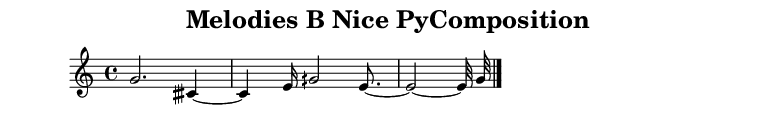

In [ ]:
pynicemelosB = music21.converter.parse('melosBNicePyComposition.xml')
play(pynicemelosB)
show(pynicemelosB)

In [ ]:
MelodyBfile = converter.parse('melosBNicePyComposition.xml')
#MelodyBfile.show()


In [ ]:
#Creating melodies,  part C

#Random pitches, within the part C notes
frtg0C = random.randrange(0, len(mylistC))
frtg1C = random.randrange(0, len(mylistC))
frtg2C = random.randrange(0, len(mylistC))
frtg3C = random.randrange(0, len(mylistC))
frtg4C = random.randrange(0, len(mylistC))
frtg5C = random.randrange(0, len(mylistC))


#Random durations from list
drtg0C = random.randrange(0, len(durationValuesRoundedAllDurations))
drtg1C = random.randrange(0, len(durationValuesRoundedAllDurations))
drtg2C = random.randrange(0, len(durationValuesRoundedAllDurations))
drtg3C = random.randrange(0, len(durationValuesRoundedAllDurations))
drtg4C = random.randrange(0, len(durationValuesRoundedAllDurations))
drtg5C = random.randrange(0, len(durationValuesRoundedAllDurations))

#############################
sMelC = stream.Score()

sCmelC = stream.Stream()

sCmelC.append(note.Note((mylistC[frtg0C]), quarterLength=(durationValuesRoundedAllDurations[drtg0C])))
sCmelC.append(note.Note((mylistC[frtg1C]), quarterLength=(durationValuesRoundedAllDurations[drtg1C])))
sCmelC.append(note.Note((mylistC[frtg2C]), quarterLength=(durationValuesRoundedAllDurations[drtg2C])))
sCmelC.append(note.Note((mylistC[frtg3C]), quarterLength=(durationValuesRoundedAllDurations[drtg3C])))
sCmelC.append(note.Note((mylistC[frtg2C]), quarterLength=(durationValuesRoundedAllDurations[drtg4C])))
sCmelC.append(note.Note((mylistC[frtg0C]), quarterLength=(durationValuesRoundedAllDurations[drtg5C])))
sMelC.append(sCmelC)

sMelC.insert(0, metadata.Metadata())
sMelC.metadata.title = 'Melodies C Nice PyComposition'
sMelC.metadata.composer = 'Data'
#sMelC.show()
#sMelC.show('midi')

sMelC.write('musicxml', fp='melosCNicePyComposition.xml')


print(mylistC[frtg0C], mylistC[frtg1C], mylistC[frtg2C], mylistC[frtg3C], mylistB[frtg4C], mylistC[frtg5C])

###############################

69.5 61.0 65.0 63.0 60.5 68.5


meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 4 of 
[None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/start>/<music21.beam.Beam 3/start>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>/<music21.beam.Beam 3/stop>>, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


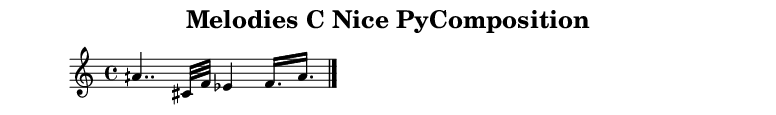

In [ ]:
pynicemelosC = music21.converter.parse('melosCNicePyComposition.xml')
play(pynicemelosC)
show(pynicemelosC)

In [ ]:
MelodyCfile = converter.parse('melosCNicePyComposition.xml')
#MelodyCfile.show()

In [ ]:
#Creating melodies,  part D

#Random pitches, within the part D notes
frtg0D = random.randrange(0, len(mylistD))
frtg1D = random.randrange(0, len(mylistD))
frtg2D = random.randrange(0, len(mylistD))
frtg3D = random.randrange(0, len(mylistD))
frtg4D = random.randrange(0, len(mylistD))
frtg5D = random.randrange(0, len(mylistD))


#Random durations from list
drtg0D = random.randrange(0, len(durationValuesRoundedAllDurations))
drtg1D = random.randrange(0, len(durationValuesRoundedAllDurations))
drtg2D = random.randrange(0, len(durationValuesRoundedAllDurations))
drtg3D = random.randrange(0, len(durationValuesRoundedAllDurations))
drtg4D = random.randrange(0, len(durationValuesRoundedAllDurations))
drtg5D = random.randrange(0, len(durationValuesRoundedAllDurations))

#############################
sMelD = stream.Score()

sDmelD = stream.Stream()

sDmelD.append(note.Note((mylistD[frtg0D]), quarterLength=(durationValuesRoundedAllDurations[drtg0D])))
sDmelD.append(note.Note((mylistD[frtg1D]), quarterLength=(durationValuesRoundedAllDurations[drtg1D])))
sDmelD.append(note.Note((mylistD[frtg2D]), quarterLength=(durationValuesRoundedAllDurations[drtg2D])))
sDmelD.append(note.Note((mylistD[frtg2D]), quarterLength=(durationValuesRoundedAllDurations[drtg4D])))
sDmelD.append(note.Note((mylistD[frtg0D]), quarterLength=(durationValuesRoundedAllDurations[drtg5D])))
sMelD.append(sDmelD)


sMelD.insert(0, metadata.Metadata())
sMelD.metadata.title = 'Melodies D Nice PyComposition'
sMelD.metadata.composer = 'Data'
#sMelD.show()
#sMelD.show('midi')

sMelD.write('musicxml', fp='melosDNicePyComposition.xml')

print(mylistD[frtg0D], mylistD[frtg1D], mylistD[frtg2D], mylistD[frtg3D], mylistD[frtg4D], mylistD[frtg5D])

###############################

60.5 69.0 65.5 69.0 68.5 69.0


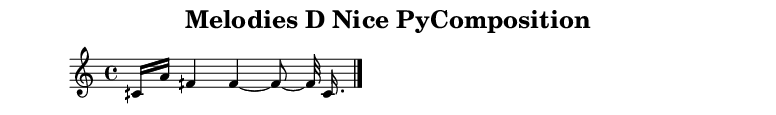

In [ ]:
pynicemelosD = music21.converter.parse('melosDNicePyComposition.xml')
play(pynicemelosD)
show(pynicemelosD)

In [ ]:
MelodyDfile = converter.parse('melosDNicePyComposition.xml')
#MelodyDfile.show()

In [ ]:
#Creating melodies,  part E

#Random pitches, within the part E notes
frtg0E = random.randrange(0, len(mylistE))
frtg1E = random.randrange(0, len(mylistE))
frtg2E = random.randrange(0, len(mylistE))
frtg3E = random.randrange(0, len(mylistE))
frtg4E = random.randrange(0, len(mylistE))
frtg5E = random.randrange(0, len(mylistE))


#Random durations
drtg0E = random.randrange(0, len(durationValuesRoundedAllDurations))
drtg1E = random.randrange(0, len(durationValuesRoundedAllDurations))
drtg2E = random.randrange(0, len(durationValuesRoundedAllDurations))
drtg3E = random.randrange(0, len(durationValuesRoundedAllDurations))
drtg4E = random.randrange(0, len(durationValuesRoundedAllDurations))
drtg5E = random.randrange(0, len(durationValuesRoundedAllDurations))

#############################
sMelE = stream.Score()

sEmelE = stream.Stream()

sEmelE.append(note.Note((mylistE[frtg0E]), quarterLength=(durationValuesRoundedAllDurations[drtg0E])))
sEmelE.append(note.Note((mylistE[frtg1E]), quarterLength=(durationValuesRoundedAllDurations[drtg1E])))
sEmelE.append(note.Note((mylistE[frtg2E]), quarterLength=(durationValuesRoundedAllDurations[drtg2E])))
sEmelE.append(note.Note((mylistE[frtg3E]), quarterLength=(durationValuesRoundedAllDurations[drtg3E])))
sEmelE.append(note.Note((mylistE[frtg2E]), quarterLength=(durationValuesRoundedAllDurations[drtg4E])))
sEmelE.append(note.Note((mylistE[frtg0E]), quarterLength=(durationValuesRoundedAllDurations[drtg5E])))
sMelE.append(sEmelE)

sMelE.insert(0, metadata.Metadata())
sMelE.metadata.title = 'Melodies E Nice PyComposition'
sMelE.metadata.composer = 'Data'
#sMelE.show()
#sMelE.show('midi')

sMelE.write('musicxml', fp='melosENicePyComposition.xml')

print(mylistE[frtg0E], mylistE[frtg1E], mylistE[frtg2E], mylistE[frtg3E], mylistE[frtg4E], mylistE[frtg5E])

###############################

64.0 61.0 69.0 61.0 64.0 60.5


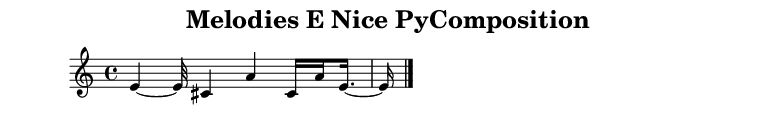

In [ ]:
pynicemelosE = music21.converter.parse('melosENicePyComposition.xml')
play(pynicemelosE)
show(pynicemelosE)

In [ ]:
MelodyEfile = converter.parse('melosENicePyComposition.xml')
#MelodyEfile.show()

In [ ]:
##Creating melodies,  part F

#Random pitches, within the part F notes
frtg0F = random.randrange(0, len(mylistF))
frtg1F = random.randrange(0, len(mylistF))
frtg2F = random.randrange(0, len(mylistF))
frtg3F = random.randrange(0, len(mylistF))
frtg4F = random.randrange(0, len(mylistF))
frtg5F = random.randrange(0, len(mylistF))


#Random durations from list
drtg0F = random.randrange(0, len(durationValuesRoundedAllDurations))
drtg1F = random.randrange(0, len(durationValuesRoundedAllDurations))
drtg2F = random.randrange(0, len(durationValuesRoundedAllDurations))
drtg3F = random.randrange(0, len(durationValuesRoundedAllDurations))
drtg4F = random.randrange(0, len(durationValuesRoundedAllDurations))
drtg5F = random.randrange(0, len(durationValuesRoundedAllDurations))

#############################
sMelF = stream.Score()

sFmelF = stream.Stream()

sFmelF.append(note.Note((mylistF[frtg0F]), quarterLength=(durationValuesRoundedAllDurations[drtg0F])))
sFmelF.append(note.Note((mylistF[frtg1F]), quarterLength=(durationValuesRoundedAllDurations[drtg1F])))
sFmelF.append(note.Note((mylistF[frtg2F]), quarterLength=(durationValuesRoundedAllDurations[drtg2F])))
sFmelF.append(note.Note((mylistF[frtg2F]), quarterLength=(durationValuesRoundedAllDurations[drtg4F])))
sFmelF.append(note.Note((mylistF[frtg0F]), quarterLength=(durationValuesRoundedAllDurations[drtg5F])))
sMelF.append(sFmelF)


sMelF.insert(0, metadata.Metadata())
sMelF.metadata.title = 'Melodies F Nice PyComposition'
sMelF.metadata.composer = 'Data'
#sMelF.show()
#sMelF.show('midi')

sMelF.write('musicxml', fp='melosFNicePyComposition.xml')


print(mylistF[frtg0F], mylistF[frtg1F], mylistF[frtg2F], mylistF[frtg3F], mylistF[frtg4F], mylistF[frtg5F])

###############################

72.0 70.0 68.5 60.5 68.0 69.0


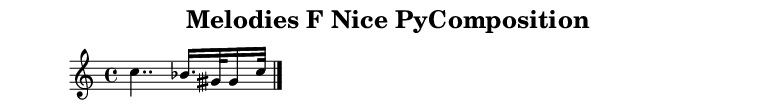

In [ ]:
pynicemelosF = music21.converter.parse('melosFNicePyComposition.xml')
play(pynicemelosF)
show(pynicemelosF)

In [ ]:
MelodyFfile = converter.parse('melosFNicePyComposition.xml')
#MelodyFfile.show()

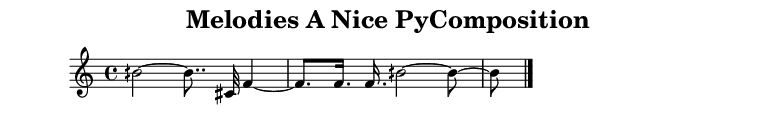

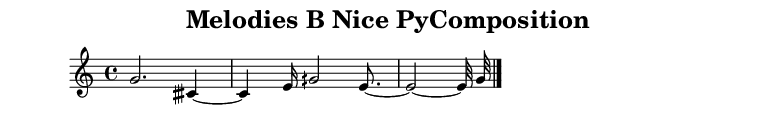

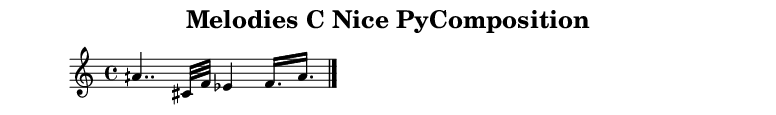

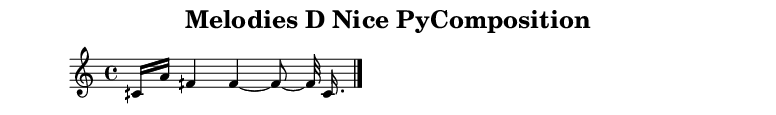

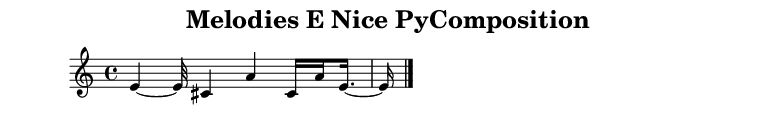

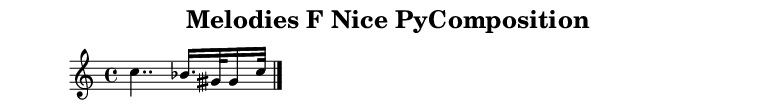

In [ ]:
play(pynicemelosA)
show(pynicemelosA)

play(pynicemelosB)
show(pynicemelosB)

play(pynicemelosC)
show(pynicemelosC)

play(pynicemelosD)
show(pynicemelosD)

play(pynicemelosE)
show(pynicemelosE)

play(pynicemelosF)
show(pynicemelosF)

## 🎶 Composition 🎻
We combine the different musical materials produced to create a musical composition


In [ ]:
#Composing
#Form : A - B - A^

PartA = stream.Score()
streamMelos1 = stream.Stream()
streamMelos2 = stream.Stream()
streamMelos3 = stream.Stream()
streamMelos4 = stream.Stream()
streamMelos5 = stream.Stream()
streamMelos6 = stream.Stream()
streamMelos7 = stream.Stream()
streamMelos8 = stream.Stream()
streamMelos9 = stream.Stream()
streamMelos10 = stream.Stream()
streamMelos11 = stream.Stream()
streamMelos12 = stream.Stream()
streamMelos13 = stream.Stream()


#First section, combining generated melodies with chords

restA = note.Rest()
restA.duration.quarterLength = 1.0


streamMelos1.append([sMelD, restA, sMelF, sMelC])

streamMelos2.repeatAppend(streamMelos1, 2)

streamMelos3.repeatAppend(sMelA, 2)

streamMelos4.append([streamMelos2, streamMelos3])

restB = note.Rest()
restB.duration.quarterLength = 1.250

restC = note.Rest()

streamMelos5.append([restB, sMelD, sMelF,sMelC])
streamMelos6.append([streamMelos4, streamMelos5])

restC.duration.quarterLength = 3.625


#Adding chords
streamMelos7.append([sMelA, restC, sMelE, s3211E])

streamMelos8.repeatAppend(streamMelos7, 2)
streamMelos9.append([streamMelos6, streamMelos7, streamMelos8, s321])

#Adding silence
restD = note.Rest()
restD.duration.quarterLength = 0.5

streamMelos10.repeatAppend(s3211F, 2)
streamMelos11.append([streamMelos9, restD, streamMelos10, s3211])

restE = note.Rest()
restE.duration.quarterLength = 2

#streamMelos12.repeatInsert(note.Rest(), range(4))
streamMelos12.repeatAppend(s321, 2)
streamMelos13.append([streamMelos11, restE, streamMelos12])

PartA.append(streamMelos13)


PartA.insert(0, metadata.Metadata())
PartA.metadata.title = 'Part A Nice PyComposition'
PartA.metadata.composer = 'Data'
#PartA.show()

#PartA.show('midi')
PartA.write('musicxml', fp='PartANicePyComposition.xml')




meter: WARNING: Found a messed up beam pair <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>, at index 3 of 
[None, None, None, <music21.beam.Beams <music21.beam.Beam 1/start>/<music21.beam.Beam 2/partial/right>>, <music21.beam.Beams <music21.beam.Beam 1/stop>/<music21.beam.Beam 2/stop>>]


'/content/PartANicePyComposition.xml'

In [ ]:
pynicePARTA = music21.converter.parse('PartANicePyComposition.xml')
play(pynicePARTA)
show(pynicePARTA)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#Second section, combining generated reversed score fragments with melodies and chords in a  lower register, and
#adding transpositions

streamMelos18 = stream.Score()

ScoreFragMelos17 = stream.Score()
streamMelos17 = stream.Stream()

ssssz = converter.parse('First_Score_Reversed_Nice_PyComposition.xml')
szsz = ssssz.parts[0].measures(2, 3)
streamMelos17.append(szsz)
ScoreFragMelos17.append(streamMelos17)


streamMelos18.append([ScoreFragMelos17, sMelA])

fragment1Transposed = stream.Score(streamMelos18).transpose(interval_1)
#fragment1Transposed.show()
#fragment1Transposed.show('midi')



In [ ]:
streamMelos20 = stream.Score()

ScoreFragMelos21 = stream.Score()
streamMelos21 = stream.Stream()

sssszz = converter.parse('First_Score_Reversed_Nice_PyComposition.xml')
szszz = sssszz.parts[0].measures(2, 5)
streamMelos21.append(szszz)
ScoreFragMelos21.append(streamMelos21)


streamMelos20.append([ScoreFragMelos21, sMelB])

fragment2Transposed = stream.Score(streamMelos20).transpose(interval_1)
#fragment2Transposed.show()
#fragment2Transposed.show('midi')

In [ ]:
streamMelos22 = stream.Score()

ScoreFragMelos23 = stream.Score()
streamMelos23 = stream.Stream()

sssszz = converter.parse('First_Score_Reversed_Nice_PyComposition.xml')
szszz = sssszz.parts[0].measures(5, 7)
streamMelos23.append(szszz)
ScoreFragMelos23.append(streamMelos23)


streamMelos22.append([ScoreFragMelos23, sMelC])

fragment3Transposed = stream.Score(streamMelos22).transpose(interval_1)
#fragment3Transposed.show()
#fragment3Transposed.show('midi')


In [ ]:

ScoreFragMelos25 = stream.Score()
ScoreFragMelos26 = stream.Score()
ScoreFragMelos27 = stream.Score()
scoreChordstoTranspose = stream.Score()

PartB1 = stream.Score()
PartB2 = stream.Score()
PartB3 = stream.Score()
ScoreFragMelos28 = stream.Score()


streamMelos25 = stream.Stream()
streamMelos26 = stream.Stream()
streamMelos27 = stream.Stream()
streamChordstoTranspose = stream.Stream()

#Transposing melodies to the different intervals for transpositions
restF = note.Rest()
restF.duration.quarterLength = 2
restG = note.Rest()
restG.duration.quarterLength = 2
restH = note.Rest()
restH.duration.quarterLength = 2

streamMelos25.append([sMelD, sMelF])
ScoreFragMelos25.append(streamMelos25)
streamMelos25Transposed = stream.Score(ScoreFragMelos25).transpose(interval_2)

streamMelos26.append([sMelC, sMelA])
ScoreFragMelos26.append(streamMelos26)
streamMelos26Transposed = stream.Score(ScoreFragMelos26).transpose(interval_3)

streamMelos27.append([restF, sMelE, sMelB])
ScoreFragMelos27.append(streamMelos27)
streamMelos27Transposed = stream.Score(ScoreFragMelos27).transpose(interval_4)


ScoreFragMelos28.append([streamMelos25Transposed, streamMelos26Transposed, streamMelos27Transposed])
#Transposing to a higher octave
ScoreFragMelos28Transposed = stream.Score(ScoreFragMelos28).transpose(+12)

#Transposing chords to interval4, in a  higher octave
streamChordstoTranspose.append([s3211E, s321, s3211F, s32111, s3211D])
scoreChordstoTranspose.append(streamChordstoTranspose)
ChordsTransposed = stream.Score(scoreChordstoTranspose).transpose(+12)
ChordsTransposed2 = stream.Score(ChordsTransposed).transpose(interval_4)


streamMelos27 = stream.Score()
ScoreFragMelos29 = stream.Score()
streamMelos29 = stream.Stream()

#Adding from measures 9  to 16 from original score
sssszzz = converter.parse('First_Score_Nice_PyComposition.xml')
szszzz = sssszzz.parts[0].measures(9, 19)
streamMelos29.append(szszzz)
ScoreFragMelos29.append(streamMelos29)


#Transposing it to interval4
fragment6Transposed = stream.Score(ScoreFragMelos29).transpose(interval_4)

#Appending  all these elements to PartB

#PartB.append([fragment1Transposed, fragment2Transposed, fragment3Transposed, ScoreFragMelos28Transposed, ChordsTransposed2, fragment6Transposed])

PartB1.append([fragment1Transposed, fragment2Transposed,fragment3Transposed])
PartB1.insert(0, metadata.Metadata())
PartB1.metadata.title = 'Part B1 Nice PyComposition'
PartB1.metadata.composer = 'Data'
#PartB1.show()

#PartB1.show('midi')
PartB1.write('musicxml', fp='PartB1NicePyComposition.xml')





'/content/PartB1NicePyComposition.xml'

In [ ]:

PartB2.append([ScoreFragMelos28Transposed, ChordsTransposed2])
PartB2.insert(0, metadata.Metadata())
PartB2.metadata.title = 'Part B2 Nice PyComposition'
PartB2.metadata.composer = 'Data'
#PartB2.show()

#PartB2.show('midi')
PartB2.write('musicxml', fp='PartB2NicePyComposition.xml')

'/content/PartB2NicePyComposition.xml'

In [ ]:

PartB3.append([fragment6Transposed])
PartB3.insert(0, metadata.Metadata())
PartB3.metadata.title = 'Part B3 Nice PyComposition'
PartB3.metadata.composer = 'Data'
#PartB3.show()

#PartB3.show('midi')
PartB3.write('musicxml', fp='PartB3NicePyComposition.xml')


'/content/PartB3NicePyComposition.xml'

In [ ]:
pynicePARTB1 = music21.converter.parse('PartB1NicePyComposition.xml')
play(pynicePARTB1)
show(pynicePARTB1)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
pynicePARTB2 = music21.converter.parse('PartB2NicePyComposition.xml')
play(pynicePARTB2)
show(pynicePARTB2)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
pynicePARTB3 = music21.converter.parse('PartB3NicePyComposition.xml')
play(pynicePARTB3)
show(pynicePARTB3)


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#Third Secction, A^


PartAprima = stream.Score()

ScoreFragMelos31 = stream.Score()
streamMelos31 = stream.Stream()

ScoreFragMelos32 = stream.Score()
streamMelos32 = stream.Stream()

ScoreFragMelos33 = stream.Score()
streamMelos33 = stream.Stream()

ScoreFragMelos34 = stream.Score()
streamMelos34 = stream.Stream()

ScoreFragMelos35 = stream.Score()
streamMelos35 = stream.Stream()

restR = note.Rest()
restR.duration.quarterLength = 2.0
restS = note.Rest()
restS.duration.quarterLength = 2.0
restT = note.Rest()
restT.duration.quarterLength = 2.0

#Adding different fragments of  PartA, transposed to the four intervals
sssszz31 = converter.parse('PartANicePyComposition.xml')
szszz31 = sssszz31.parts[0].measures(0, 5)
streamMelos31.append(szszz31)
ScoreFragMelos31.append(streamMelos31)
fragment31Transposed = stream.Score(ScoreFragMelos31).transpose(interval_4)

sssszz32 = converter.parse('PartANicePyComposition.xml')
szszz32 = sssszz32.parts[0].measures(6, 8)
streamMelos32.append(szszz32)
ScoreFragMelos32.append(streamMelos32)
fragment32Transposed = stream.Score(ScoreFragMelos32).transpose(interval_3)

sssszz33 = converter.parse('PartANicePyComposition.xml')
szszz33 = sssszz33.parts[0].measures(17, 22)
streamMelos33.append(szszz33)
ScoreFragMelos33.append(streamMelos33)
fragment33Transposed = stream.Score(ScoreFragMelos33).transpose(interval_2)

sssszz34 = converter.parse('PartANicePyComposition.xml')
szszz34 = sssszz34.parts[0].measures(45, 50)
streamMelos34.append(szszz34)
ScoreFragMelos34.append(streamMelos34)
fragment34Transposed = stream.Score(ScoreFragMelos34).transpose(interval_1)
fragment34bTransposed = stream.Score(fragment34Transposed).transpose(12)

sssszz35 = converter.parse('PartANicePyComposition.xml')
szszz35 = sssszz35.parts[0].measures(16, 18)
streamMelos35.append(szszz35)
ScoreFragMelos35.append(streamMelos35)
fragment35Transposed = stream.Score(ScoreFragMelos35).transpose(12)

#Adding some silences
rest2 = note.Rest()
rest2.duration.quarterLength = 4.0
rest3 = note.Rest()
rest3.duration.quarterLength = 6.0

PartAprima.append([fragment31Transposed, fragment32Transposed, fragment33Transposed, fragment34bTransposed, rest2, fragment35Transposed, rest3])


PartAprima.insert(0, metadata.Metadata())
PartAprima.metadata.title = 'Part A^ Nice PyComposition'
PartAprima.metadata.composer = 'Data'
#PartAprima.show()

#PartAprima.show('midi')
PartAprima.write('musicxml', fp='PartA^NicePyComposition.xml')


'/content/PartA^NicePyComposition.xml'

In [ ]:
pynicePARTAprima = music21.converter.parse('PartA^NicePyComposition.xml')
play(pynicePARTAprima)
show(pynicePARTAprima)


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#Appending PartA, PartB and PartA^ to one general score
ScoreNiceData= stream.Score()
ScoreNiceData.append([PartA, PartB1, PartB2, PartB3, PartAprima])


ScoreNiceData.insert(0, metadata.Metadata())
ScoreNiceData.metadata.title = 'Score Nice Data PyComposition'
ScoreNiceData.metadata.composer = 'Data'
#ScoreNiceData.show()

#ScoreNiceData.show('midi')
ScoreNiceData.write('musicxml', fp='ScoreNiceDataPyComposition.xml')
ScoreNiceData.write('midi', fp='MidiNiceDataPyComposition.mid')


'MidiNiceDataPyComposition.mid'

Download the .xml and the .mid files and open them with some engraving software.


In [ ]:
from google.colab import files
files.download('ScoreNiceDataPyComposition.xml')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
files.download('MidiNiceDataPyComposition.mid')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [9]:
!ls -R /content/sample_data/


/content/sample_data/:
anscombe.json		     california_housing_train.csv  mnist_test.csv	  README.md
california_housing_test.csv  datanice.json		   mnist_train_small.csv


In [1]:
!apt-get install git -y
!git config --global user.email "rominaromay@hotmail.com"
!git config --global user.name "RominaSR"


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.12).
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.


In [2]:
!git clone https://github.com/RominaSR/weather-data-analysis-to-music.git


Cloning into 'weather-data-analysis-to-music'...


In [8]:
!cp /content/sample_data/datanice.json /content/weather-data-analysis-to-music/


In [9]:
!ls /content/sample_data/
!ls /content/weather-data-analysis-to-music/


anscombe.json		     california_housing_train.csv  mnist_test.csv	  README.md
california_housing_test.csv  datanice.json		   mnist_train_small.csv
datanice.json


In [13]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [15]:
!cp "/content/drive/MyDrive/Colab_Notebooks/Nice_PyComposition(reviewed).ipynb" /content/weather-data-analysis-to-music/


cp: cannot stat '/content/drive/MyDrive/Colab\Notebooks/Nice_PyComposition(reviewed).ipynb': No such file or directory


In [12]:
!find /content/ -name "*.ipynb"
